In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [44]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

In [45]:
X=pd.read_csv('train_values.csv',header=0,na_values='?',index_col=0)
y=pd.read_csv('train_labels.csv',header=0,na_values='?',index_col=0)
#Z=pd.read_csv('test_values.csv',header=0,na_values='?')

In [46]:
Xy=pd.concat([X,y],axis=1)

In [47]:
summary=Xy.loc[:,('geo_level_1_id','geo_level_2_id','geo_level_3_id','age','area','height','count_floors_pre_eq','count_families')]

In [48]:
summary.describe()

geo_level_1_id  geo_level_2_id  geo_level_3_id           age  \
count    10000.000000    10000.000000    10000.000000  10000.000000   
mean         7.135600      296.930300     2678.617900     25.393500   
std          6.225567      279.390651     2520.663769     64.482893   
min          0.000000        0.000000        0.000000      0.000000   
25%          2.000000       60.000000      606.750000     10.000000   
50%          6.000000      219.000000     1937.500000     15.000000   
75%         10.000000      466.000000     4158.000000     30.000000   
max         30.000000     1411.000000    12151.000000    995.000000   

               area        height  count_floors_pre_eq  count_families  
count  10000.000000  10000.000000         10000.000000    10000.000000  
mean      38.438100      4.653100             2.146700        0.984600  
std       21.265883      1.792842             0.736365        0.423297  
min        6.000000      1.000000             1.000000        0.000000  
25%       26.000000      4.000000             2.000000        1.000000  
50%       34.000000      5.000000             2.000000        1.000000  
75%       44.000000      5.000000             3.000000        1.000000  
max      425.000000     30.000000             9.000000        7.000000

In [49]:
X.dtypes

geo_level_1_id                              int64
geo_level_2_id                              int64
geo_level_3_id                              int64
count_floors_pre_eq                         int64
age                                         int64
area                                        int64
height                                      int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64
has_superstructure_cement_mortar_brick      int64


In [50]:
Xy.describe()

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  \
count    10000.000000    10000.000000    10000.000000         10000.000000   
mean         7.135600      296.930300     2678.617900             2.146700   
std          6.225567      279.390651     2520.663769             0.736365   
min          0.000000        0.000000        0.000000             1.000000   
25%          2.000000       60.000000      606.750000             2.000000   
50%          6.000000      219.000000     1937.500000             2.000000   
75%         10.000000      466.000000     4158.000000             3.000000   
max         30.000000     1411.000000    12151.000000             9.000000   

                age          area        height  has_superstructure_adobe_mud  \
count  10000.000000  10000.000000  10000.000000                  10000.000000   
mean      25.393500     38.438100      4.653100                      0.089700   
std       64.482893     21.265883      1.792842                      0.285766   
min        0.000000      6.000000      1.000000                      0.000000   
25%       10.000000     26.000000      4.000000                      0.000000   
50%       15.000000     34.000000      5.000000                      0.000000   
75%       30.000000     44.000000      5.000000                      0.000000   
max      995.000000    425.000000     30.000000                      1.000000   

       has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
count                         10000.000000                    10000.00000   
mean                              0.762600                        0.02990   
std                               0.425511                        0.17032   
min                               0.000000                        0.00000   
25%                               1.000000                        0.00000   
50%                               1.000000                        0.00000   
75%                               1.000000                        0.00000   
max                               1.000000                        1.00000   

           ...       has_secondary_use_hotel  has_secondary_use_rental  \
count      ...                  10000.000000              10000.000000   
mean       ...                      0.029400                  0.006400   
std        ...                      0.168933                  0.079748   
min        ...                      0.000000                  0.000000   
25%        ...                      0.000000                  0.000000   
50%        ...                      0.000000                  0.000000   
75%        ...                      0.000000                  0.000000   
max        ...                      1.000000                  1.000000   

       has_secondary_use_institution  has_secondary_use_school  \
count                    10000.00000               10000.00000   
mean                         0.00070                   0.00070   
std                          0.02645                   0.02645   
min                          0.00000                   0.00000   
25%                          0.00000                   0.00000   
50%                          0.00000                   0.00000   
75%                          0.00000                   0.00000   
max                          1.00000                   1.00000   

       has_secondary_use_industry  has_secondary_use_health_post  \
count                10000.000000                   10000.000000   
mean                     0.000800                       0.000200   
std                      0.028274                       0.014141   
min                      0.000000                       0.000000   
25%                      0.000000                       0.000000   
50%                      0.000000                       0.000000   
75%                      0.000000                       0.000000   
max                      1.000000                       1.000000   

     

In [51]:
sli1=Xy.loc[Xy.age < 200, 'age']
sli2=Xy.loc[:,['height']]
sli3=Xy.loc[:,['area']]
sli4=Xy.loc[:,['count_floors_pre_eq']]
sli5=Xy.loc[:,['count_families']]
sli6=Xy.loc[:,['count_floors_pre_eq','count_families','height']]
#sli7=Xy.loc[:,[[Xy.damage_grade==1,'damage_grade'],'age']]

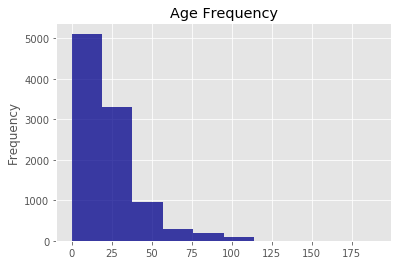

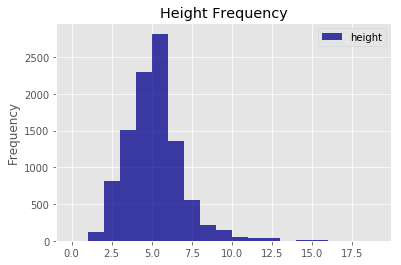

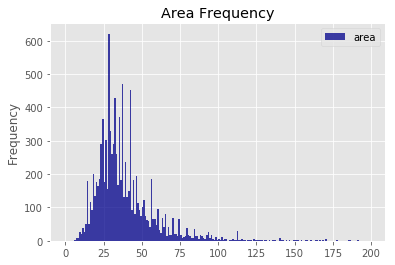

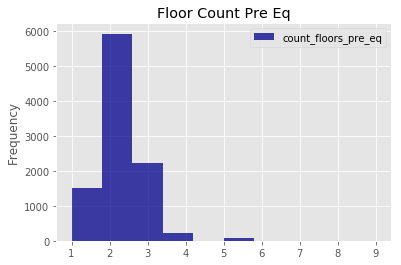

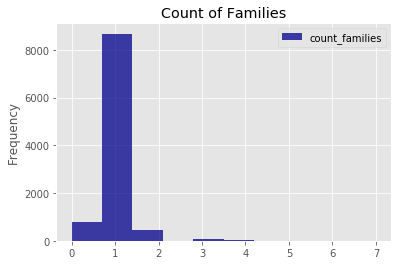

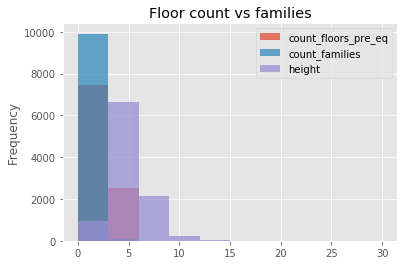

In [52]:
sli1.plot.hist(title="Age Frequency",alpha=0.75,color="darkblue")
sli2.plot.hist(title="Height Frequency",alpha=0.75,color="darkblue",bins=range(0,20))
sli3.plot.hist(title="Area Frequency", alpha=0.75,color="darkblue",bins=range(0,200))
sli4.plot.hist(title="Floor Count Pre Eq", alpha=0.75,color="darkblue")
sli5.plot.hist(title="Count of Families", alpha=0.75,color="darkblue")
sli6.plot.hist(title="Floor count vs families", alpha=0.75)
plt.show()

In [53]:
Xy.groupby(['damage_grade'])['age'].mean()

damage_grade
1    12.633262
2    26.965046
3    26.301810
Name: age, dtype: float64

In [54]:
Xy.groupby(['damage_grade'])['height'].mean()

damage_grade
1    4.415778
2    4.670334
3    4.689726
Name: height, dtype: float64

In [55]:
Xy.groupby(['damage_grade'])['height'].median()

damage_grade
1    4
2    5
3    5
Name: height, dtype: int64

In [56]:
Xy.groupby(['damage_grade'])['area'].mean()

damage_grade
1    46.320896
2    38.464336
3    36.236719
Name: area, dtype: float64

In [57]:
Xy.groupby(['damage_grade'])['area'].count()

damage_grade
1     938
2    5636
3    3426
Name: area, dtype: int64

In [58]:
Xy.groupby(['damage_grade']).count()

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
damage_grade                                                   
1                        938             938             938   
2                       5636            5636            5636   
3                       3426            3426            3426   

              count_floors_pre_eq   age  area  height  land_surface_condition  \
damage_grade                                                                    
1                             938   938   938     938                     938   
2                            5636  5636  5636    5636                    5636   
3                            3426  3426  3426    3426                    3426   

              foundation_type  roof_type           ...             \
damage_grade                                       ...              
1                         938        938           ...              
2                        5636       5636           ...              
3                        3426       3426           ...              

              has_secondary_use_agriculture  has_secondary_use_hotel  \
damage_grade                                                           
1                                       938                      938   
2                                      5636                     5636   
3                                      3426                     3426   

              has_secondary_use_rental  has_secondary_use_institution  \
damage_grade                                                            
1                                  938                            938   
2                                 5636                           5636   
3                                 3426                           3426   

              has_secondary_use_school  has_secondary_use_industry  \
damage_grade                                                         
1                                  938                         938   
2                                 5636                        5636   
3                                 3426                        3426   

              has_secondary_use_health_post  has_secondary_use_gov_office  \
damage_grade                                                                
1                                       938                           938   
2                                      5636                          5636   
3                                      3426                          3426   

              has_secondary_use_use_police  has_secondary_use_other  
damage_grade                                                         
1                                      938                      938  
2                                     5636                     5636  
3                                     3426                     3426  

[3 rows x 38 columns]

In [59]:
Xy.area.mean()

38.4381

In [60]:
Xy.height.mean()

4.6531

**Prepping for graphing

In [61]:
#data_points=Xy.loc[:,('geo_level_1_id','geo_level_2_id', 'geo_level_3_id','count_floors_pre_eq','age','area','height', 'count_families', 'has_superstructure_mud_mortar_stone','has_superstructure_adobe_mud', 'has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution', 'has_secondary_use_other','damage_grade')].copy()
data_points1 = Xy.loc[:,('geo_level_1_id','geo_level_2_id', 'geo_level_3_id', 'damage_grade')].copy()
data_points2= Xy.loc[:,('count_floors_pre_eq','age','area','height', 'damage_grade','count_families')].copy()
data_points3= Xy.loc[:,('has_superstructure_mud_mortar_stone','has_superstructure_adobe_mud', 'has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution', 'has_secondary_use_other','damage_grade')].copy()

In [62]:
#data_points

In [63]:
sl_age=Xy.ix[Xy.damage_grade == 1, 'age']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [64]:
sl_age

building_id
15616    15
15691     5
14111    35
8105      5
12875    15
14441     0
18899     5
6442     15
5526     20
4463     35
7631      5
2176      0
10775    25
17783     0
7140      5
6876     45
4183      5
9711      5
15505     0
1435     10
19609     5
4592     15
10457    10
7941      0
2854      5
9636     20
11555    20
11598    20
6231     10
10982     5
         ..
6541     15
6684      0
10333    10
12650     5
7519     20
7802     25
1200      0
15207    20
18870    10
12854    60
19941     5
13189    10
10906     5
9329     15
8445      0
17227    25
6165     10
17253    10
505      10
10416     5
18902     0
11274     0
9991      0
715       5
16376     0
1372      5
11631     5
1612     10
18900    25
7751     10
Name: age, Length: 938, dtype: int64

In [65]:
def quake_bar(df):   
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import numpy as np
    import matplotlib.pyplot as plt
    
## Create a series of bar plots for the various levels of the
## string columns in the data frame by readmi_class. 
    names = df.columns.tolist()
    for col in names:
        if(df[col].dtype not in [np.int64, np.int32, np.float64]):
            temp2 = df.ix[df.damage_grade == 1, col].value_counts()
            temp1 = df.ix[df.damage_grade == 2, col].value_counts() 
            temp0 = df.ix[df.damage_grade == 3, col].value_counts() 
        
            fig = plt.figure(figsize = (12,6))
            fig.clf()
            ax2 = fig.add_subplot(2,2,1)
            ax1 = fig.add_subplot(2,2,2)
            ax0 = fig.add_subplot(2,1,2) 
            #(ax0, ax1, ax2) = plt.subplots(3, sharex=True, sharey=True)
            temp0.plot(kind = 'bar', ax = ax0)
            ax0.set_title(col + '\n for damage grade 3')
        #    fig.savefig('bar_' + col + '.png')
            temp1.plot(kind = 'bar', ax = ax1)
            ax1.set_title(col + '\n for damage grade 2')
            temp2.plot(kind = 'bar', ax = ax2)
            ax2.set_title(col + '\n for damage grade 1')
         #   fig.savefig('bar_' + col + '.png')
            
    return 'Done'

def quake_box(df):
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import numpy as np
    import matplotlib.pyplot as plt
    
## Now make some box plots of the columbns with numerical values.
    names = df.columns.tolist()
    for col in names:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):
            temp2 = df.ix[df.damage_grade == 1, col]
            temp1 = df.ix[df.damage_grade == 2, col]
            temp0 = df.ix[df.damage_grade == 3, col]  
             
             
            fig = plt.figure(figsize = (12,6))
            fig.clf()
            ax2 = fig.add_subplot(2, 2, 1)
            ax1 = fig.add_subplot(2, 2, 2)
            ax0 = fig.add_subplot(2, 1, 2) 
            
            ax2.boxplot(temp2.as_matrix())
            ax2.set_title(col + '\n for damage grade 1')
            ax1.boxplot(temp1.as_matrix())
            ax1.set_title(col + '\n for damage grade 2')
            ax0.boxplot(temp0.as_matrix())
            ax0.set_title(col + '\n for damage grade 3')
     #       fig.savefig('box_' + col + '.png')

    return 'Done'
    
def quake_hist(df):
    import matplotlib
    matplotlib.use('agg')  # Set backend
    import numpy as np
    import matplotlib.pyplot as plt
    
## Now make historgrams of the columbns with numerical values.
    names = df.columns.tolist()
    for col in names:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):
            temp2 = df.ix[df.damage_grade == 1, col]
            temp1 = df.ix[df.damage_grade == 2, col]
            temp0 = df.ix[df.damage_grade == 3, col]  
             
            fig = plt.figure(figsize = (12,6))
            fig.clf()
            ax2 = fig.add_subplot(2, 2, 1)
            ax1 = fig.add_subplot(2, 2, 2)
            ax0 = fig.add_subplot(2, 1, 2) 
            
            ax2.hist(temp2.as_matrix(), bins = 30)
            ax2.set_title(col + '\n for damage grade 1')
            ax1.hist(temp1.as_matrix(), bins = 30)
            ax1.set_title(col + '\n for damage grade 2')
            ax0.hist(temp0.as_matrix(), bins = 30)
            ax0.set_title(col + '\n for damage grade 3')
     #       fig.savefig('hist_' + col + '.png')

    return 'Done'    

In [ ]:
***HeatMap of numerical features (geo_levels are not)

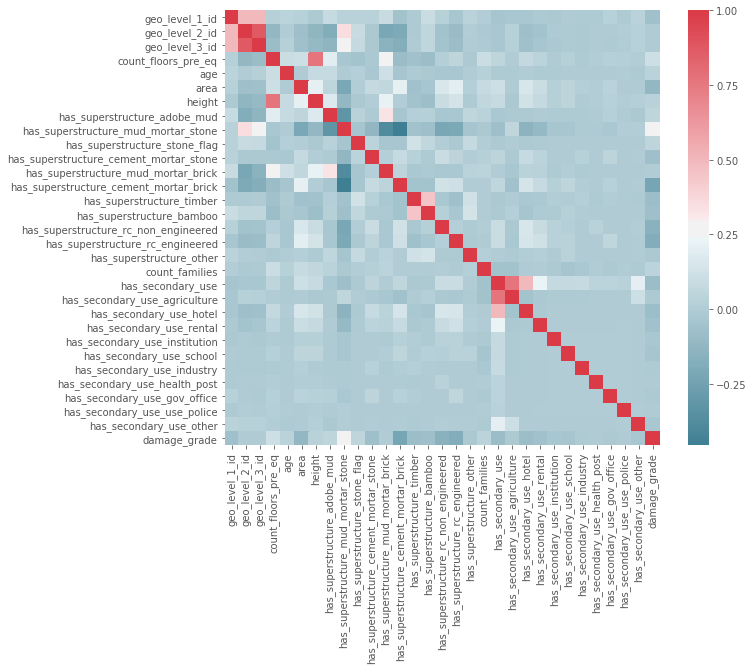

In [66]:
f, ax = plt.subplots(figsize=(10, 8))
corr = Xy.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E3821D0>,
      dtype=object)

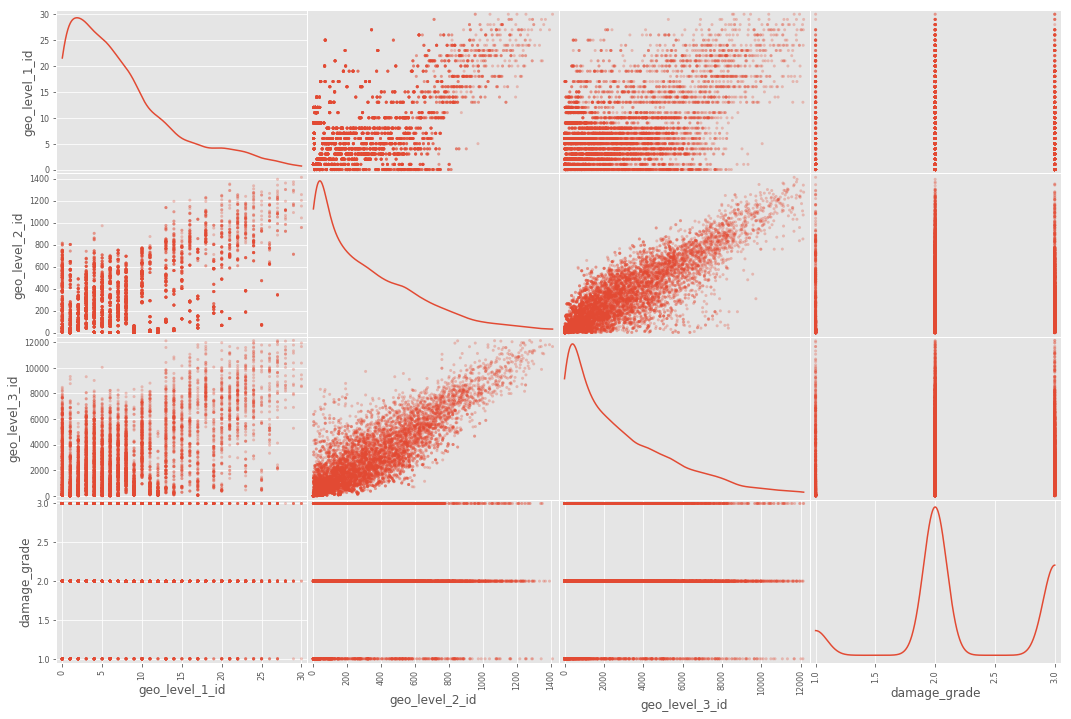

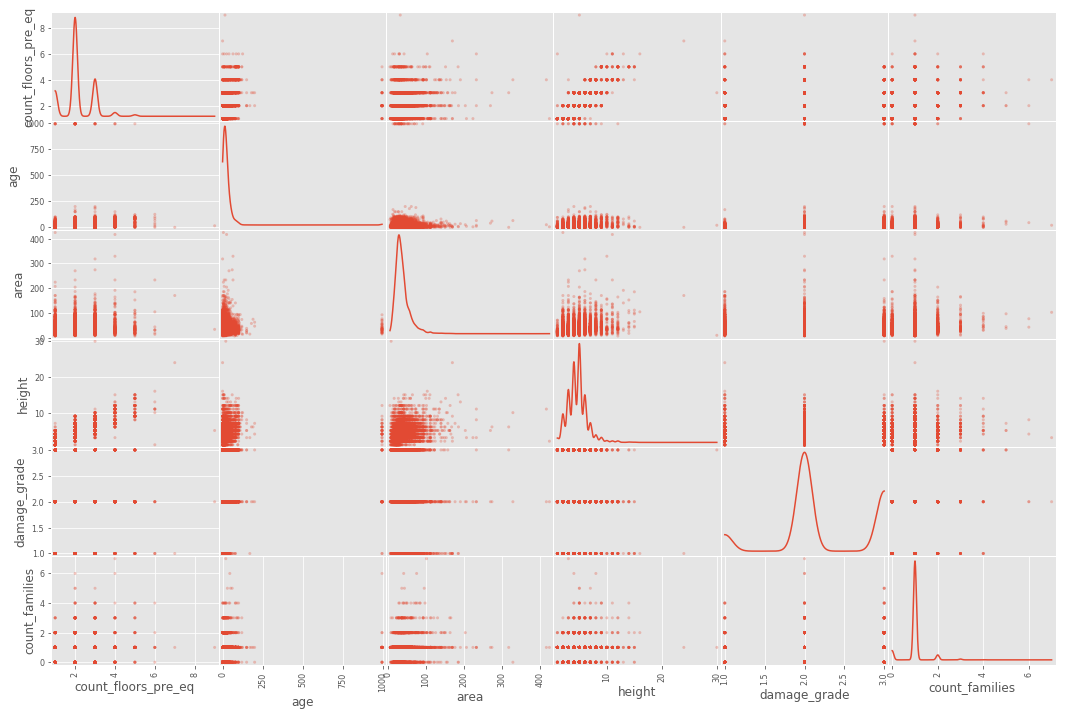

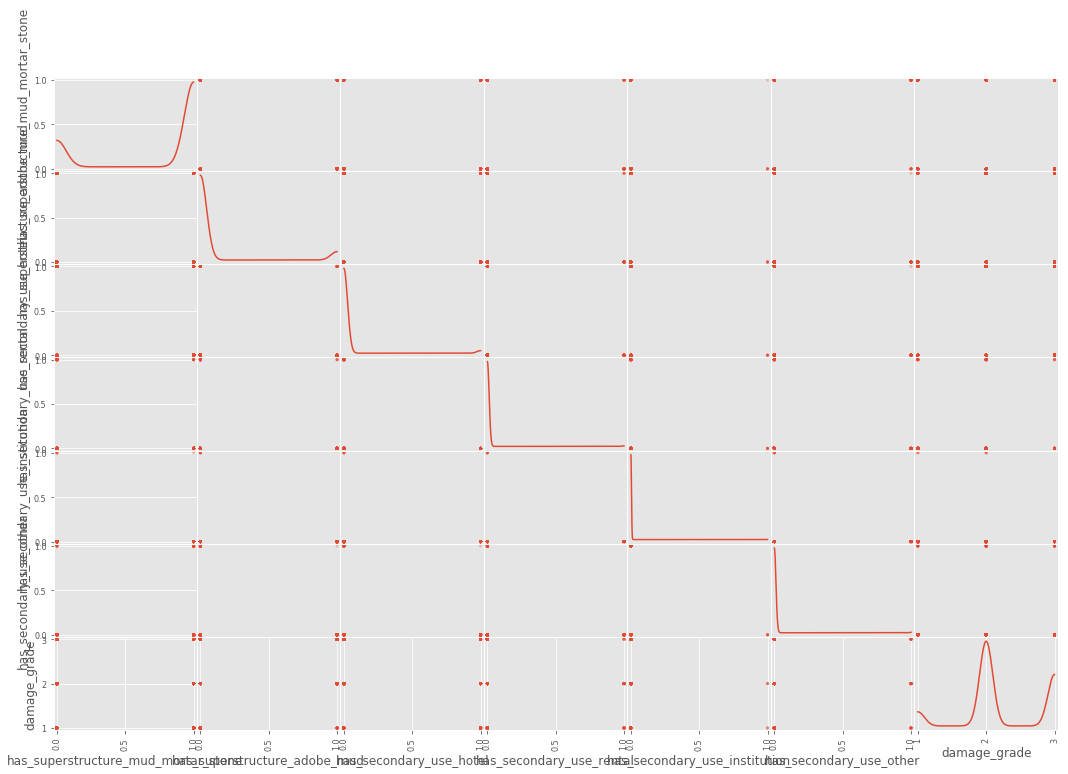

In [67]:
pd.plotting.scatter_matrix(data_points1, alpha = 0.3, figsize = (18,12), diagonal = 'kde')
pd.plotting.scatter_matrix(data_points2, alpha = 0.3, figsize = (18,12), diagonal = 'kde')
pd.plotting.scatter_matrix(data_points3, alpha = 0.3, figsize = (18,12), diagonal = 'kde')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


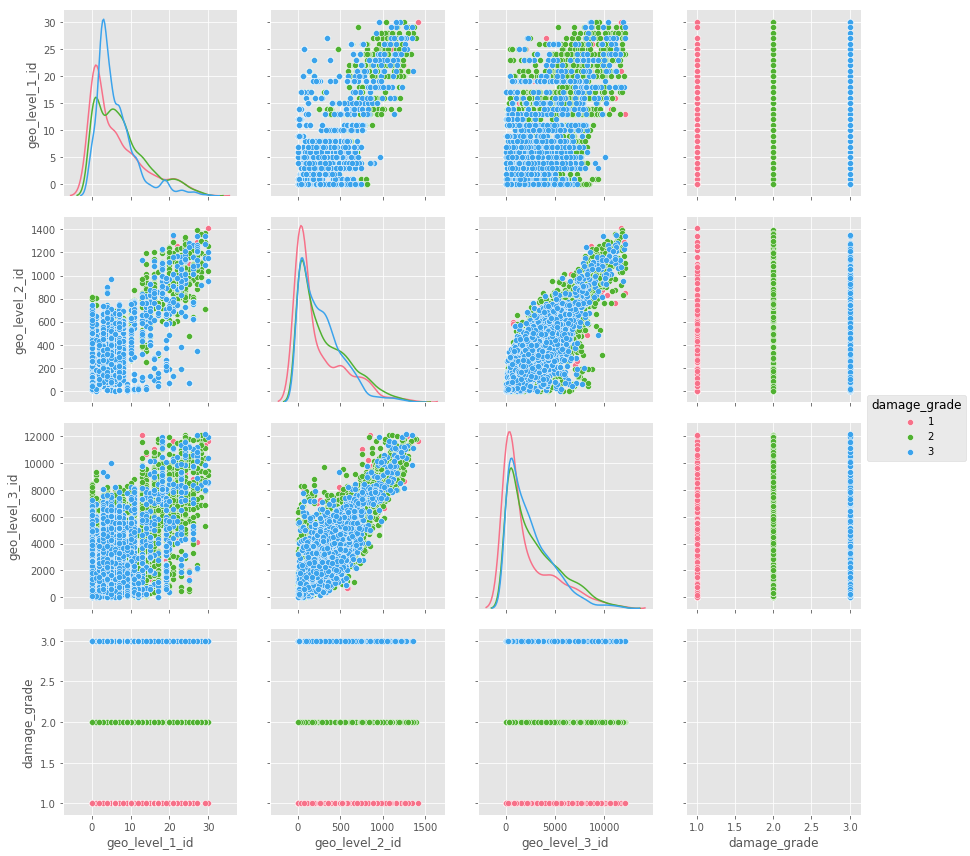

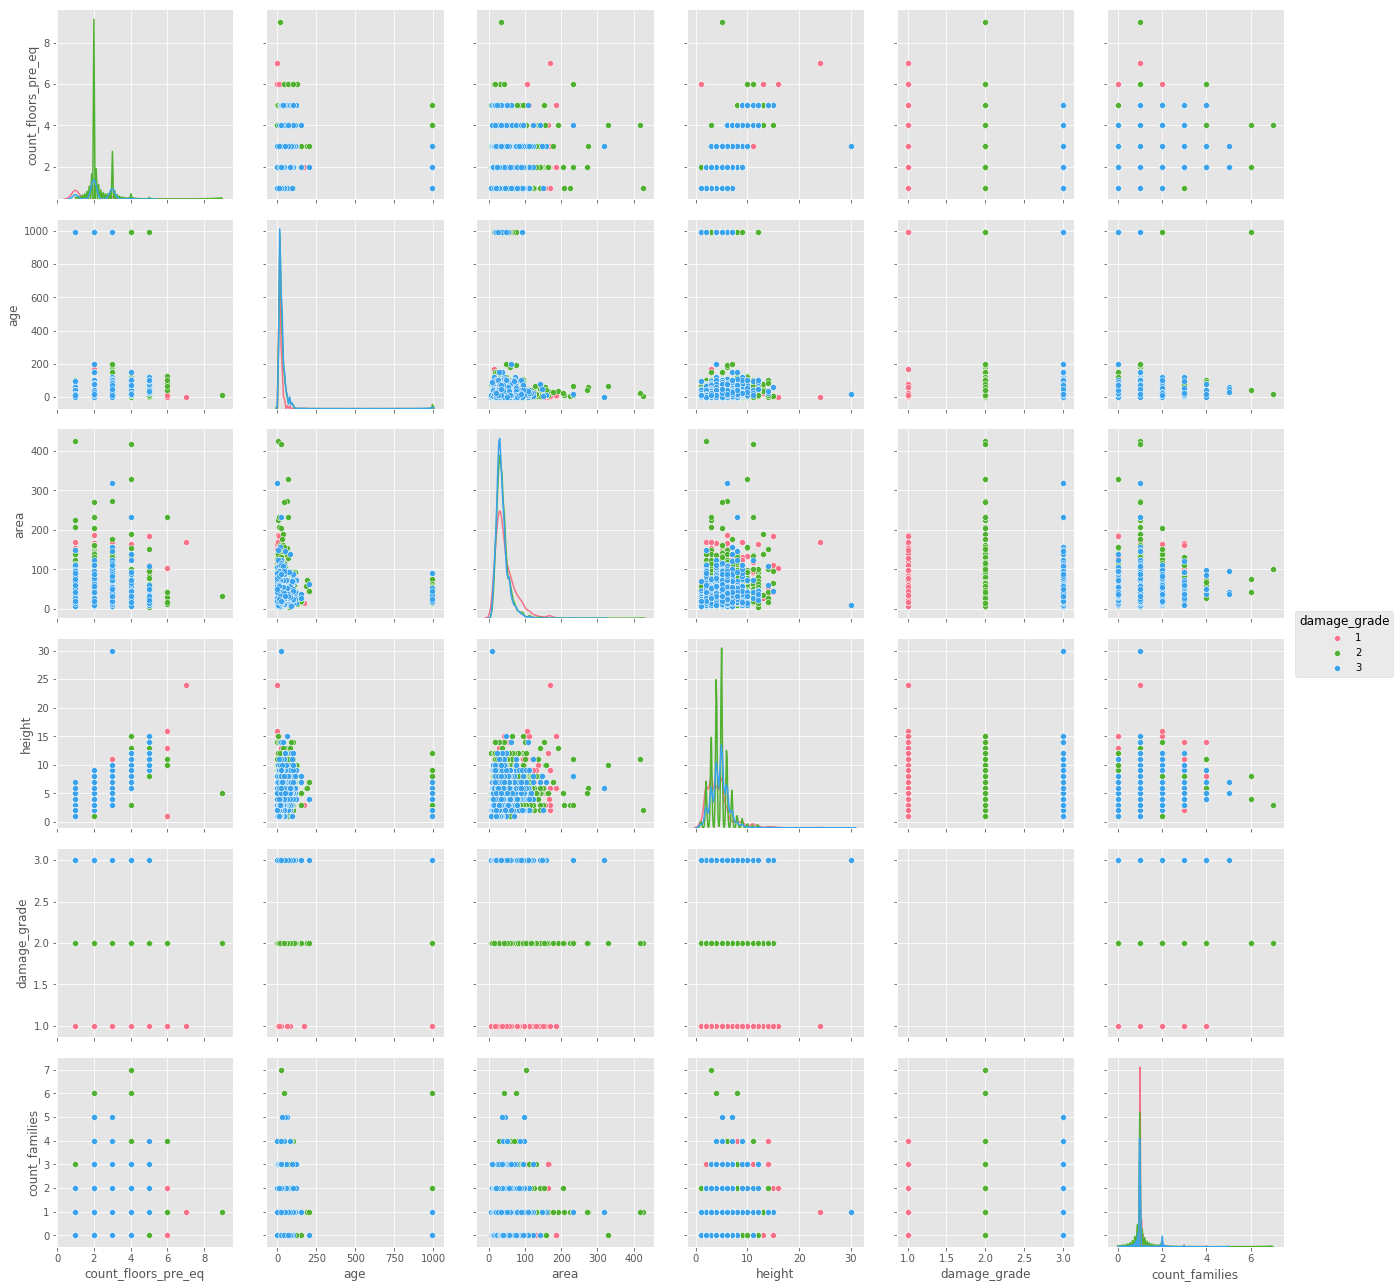

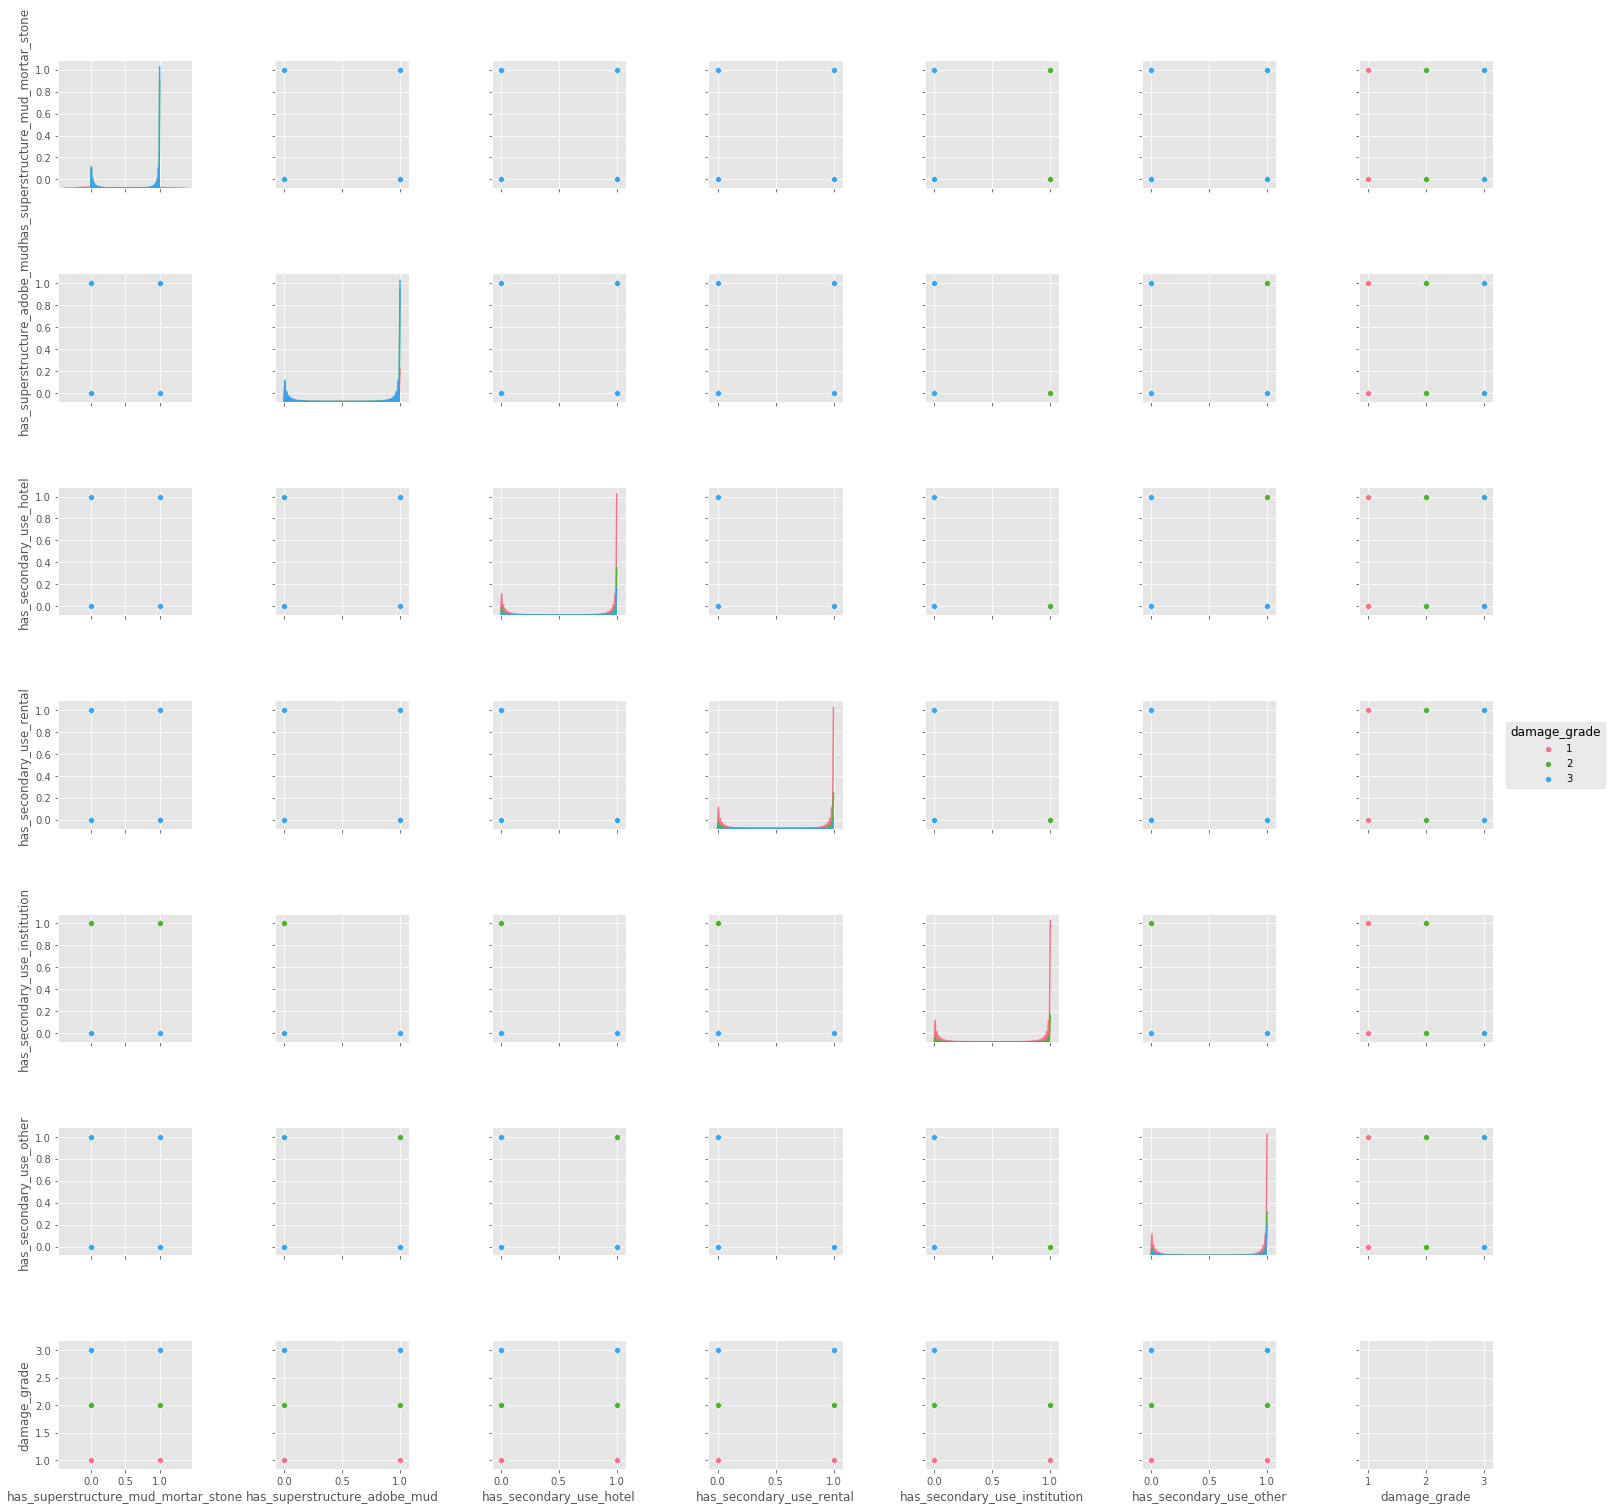

In [68]:
sns.pairplot(data_points1,hue='damage_grade', diag_kind="kde", size=3, palette='husl')
sns.pairplot(data_points2,hue='damage_grade', diag_kind="kde", size=3, palette='husl')
sns.pairplot(data_points3,hue='damage_grade', diag_kind="kde", size=3, palette='husl')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\An

'Done'

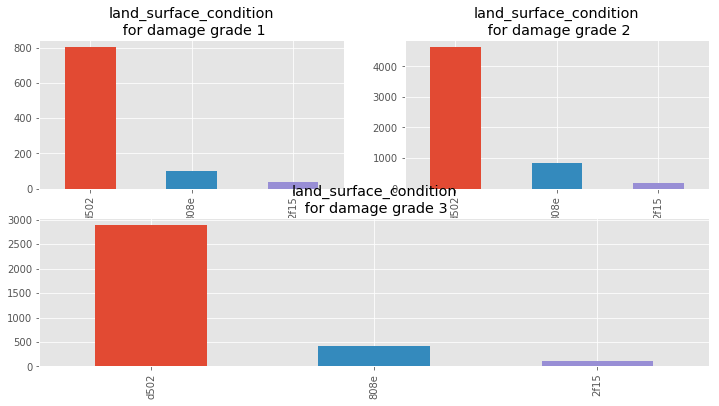

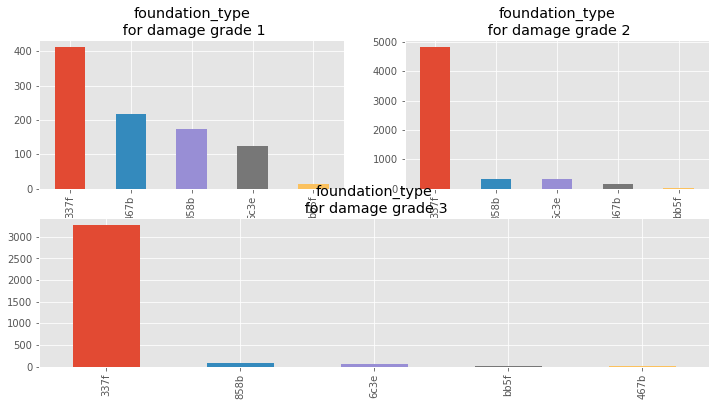

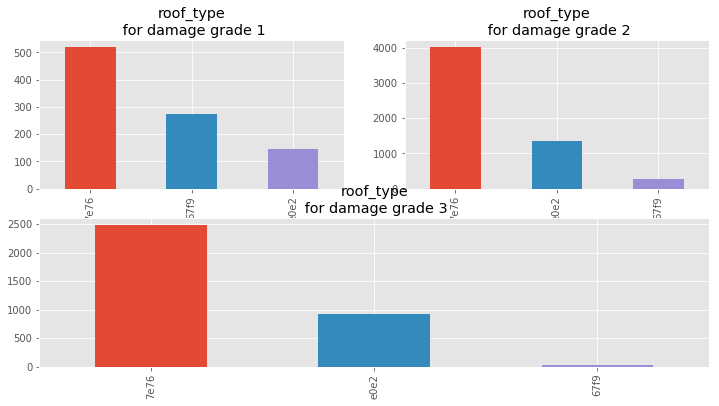

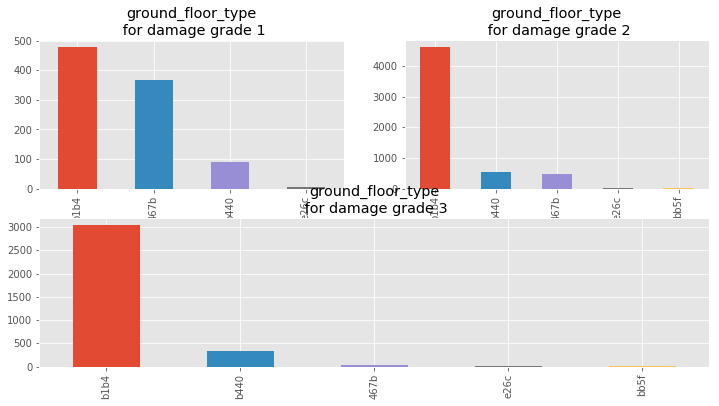

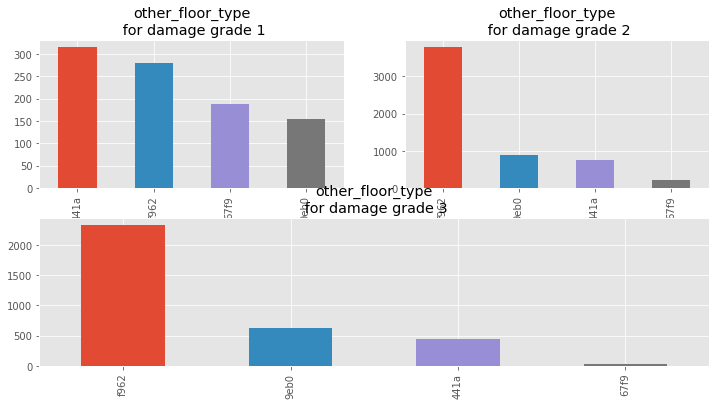

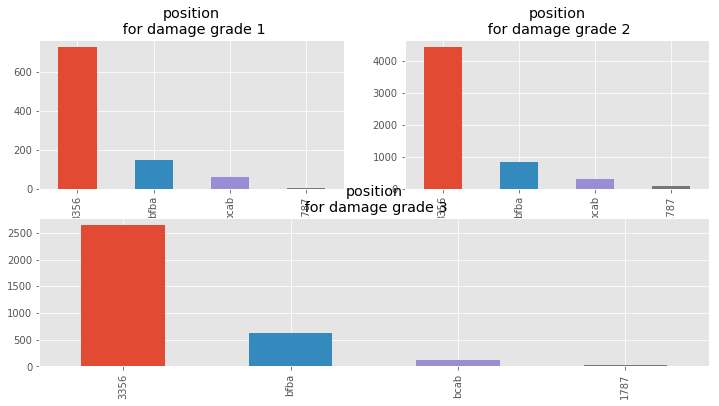

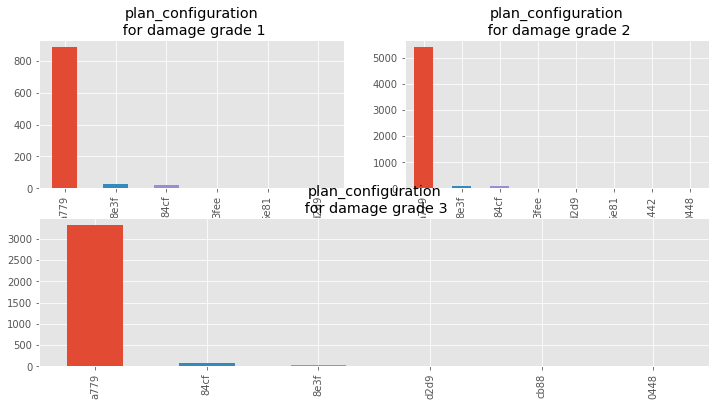

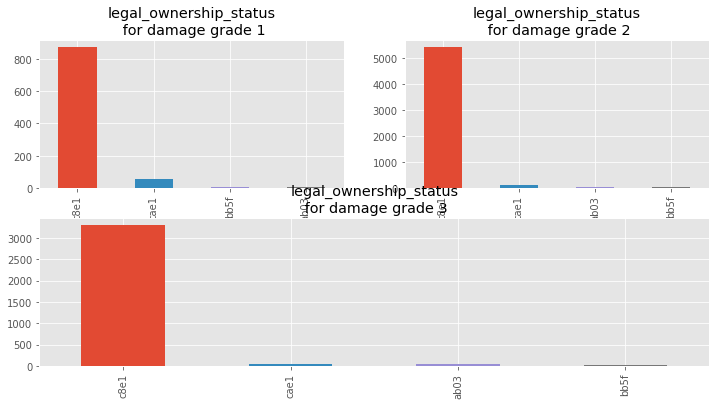

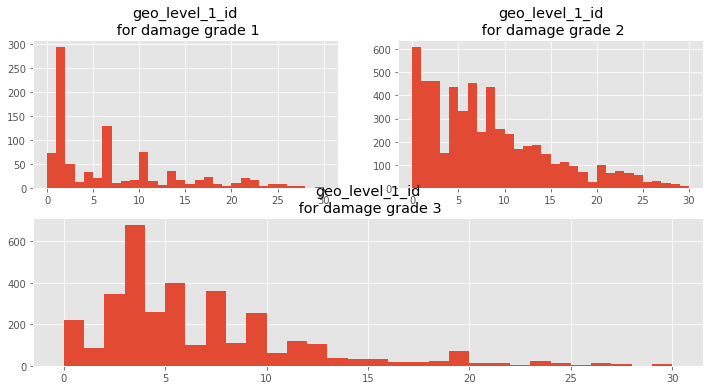

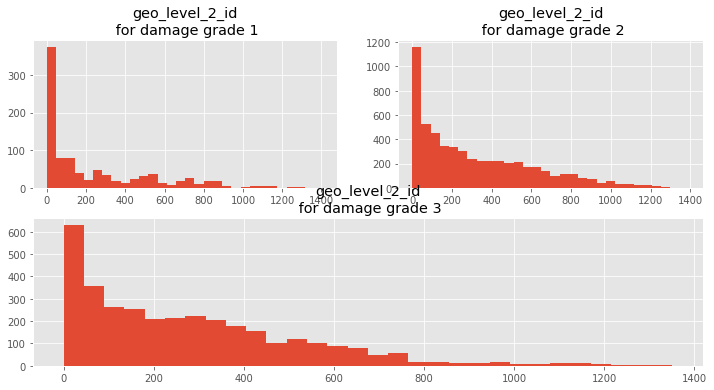

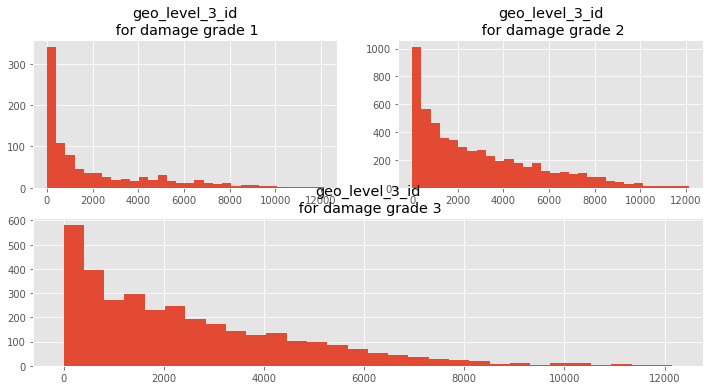

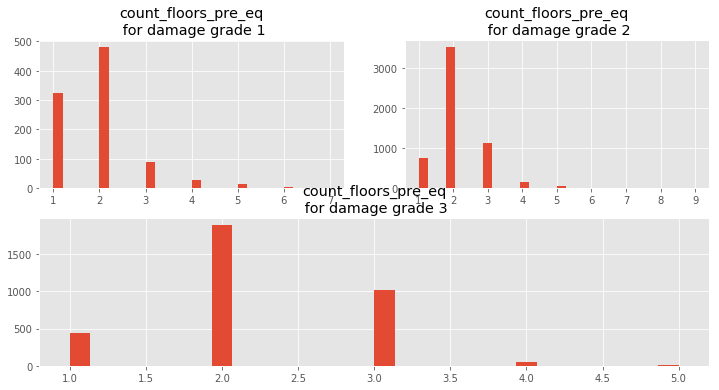

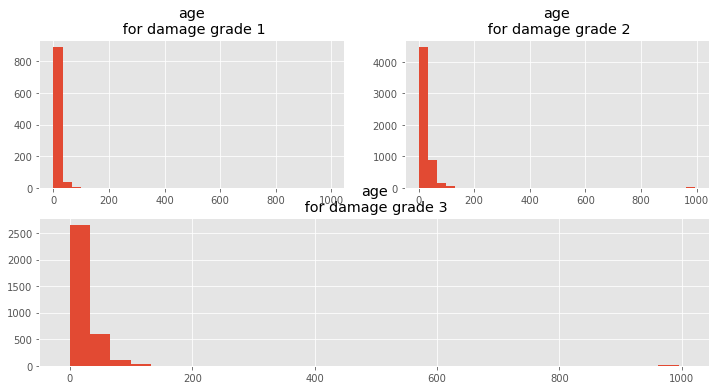

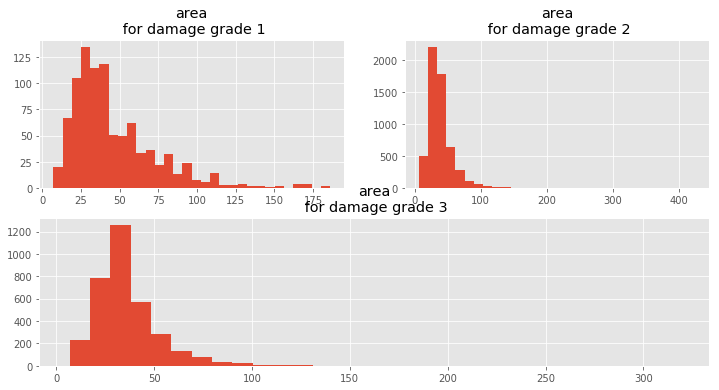

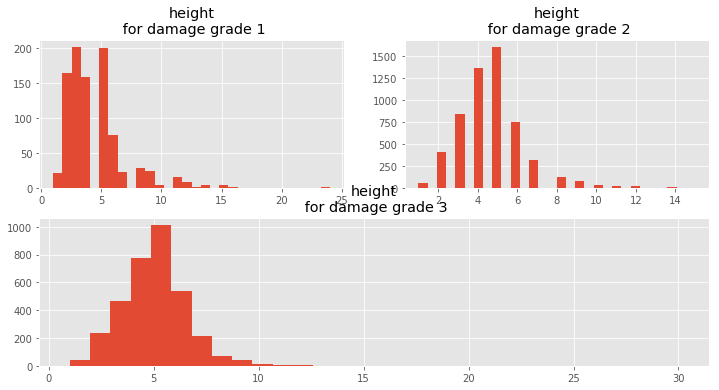

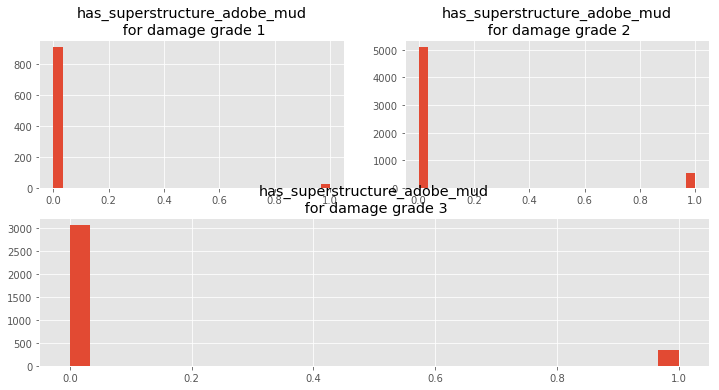

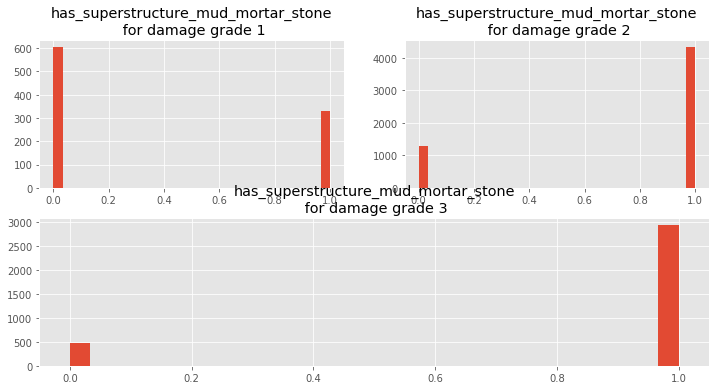

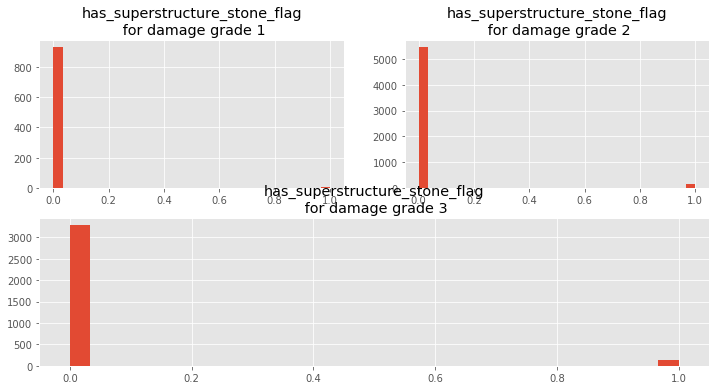

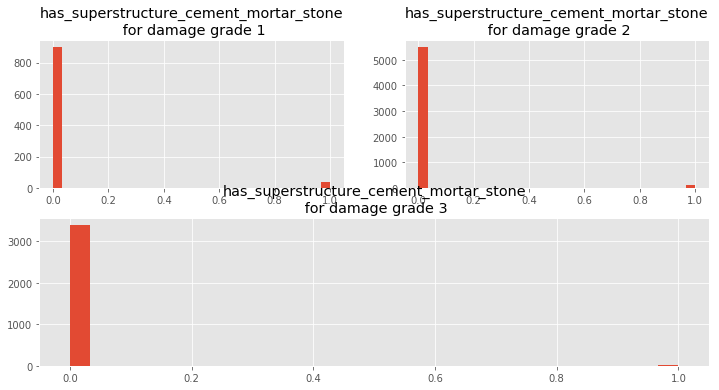

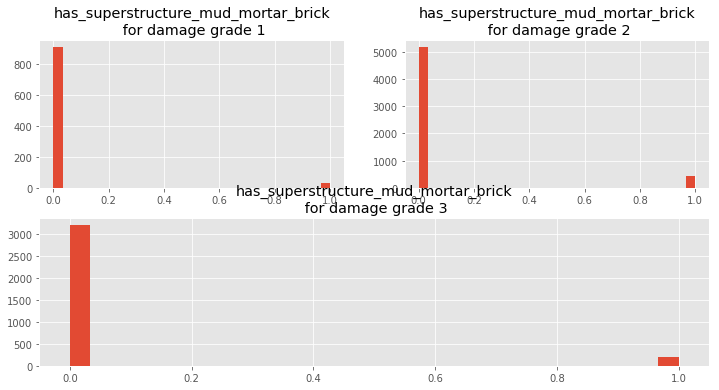

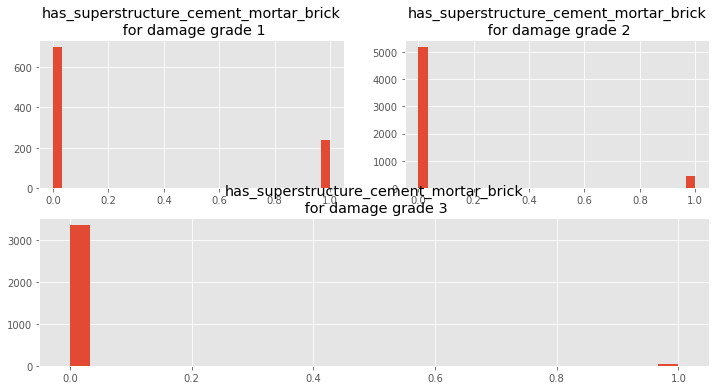

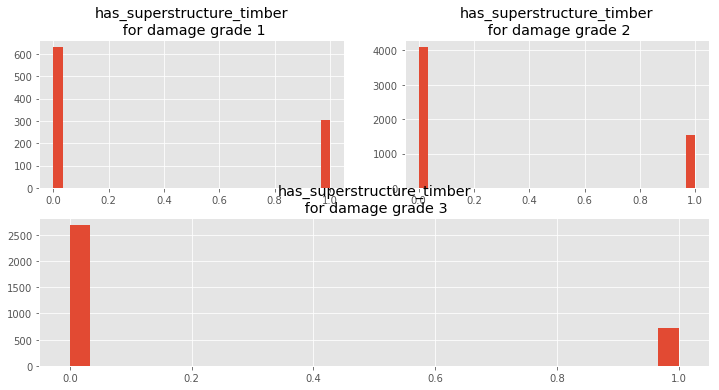

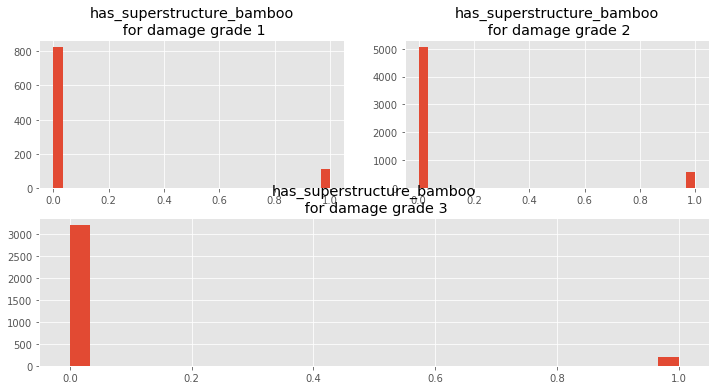

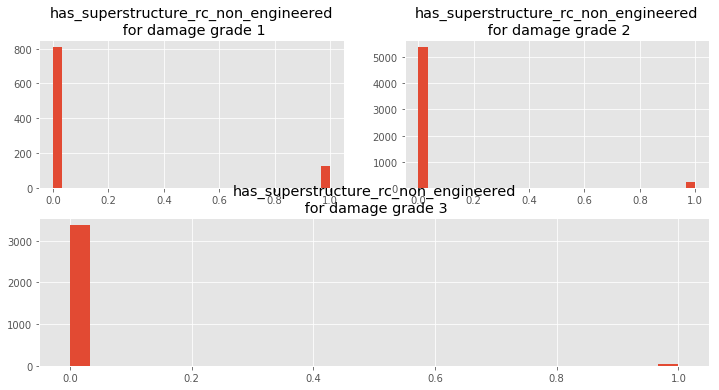

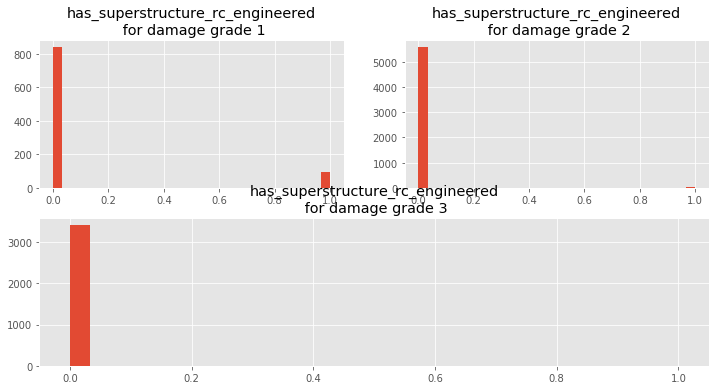

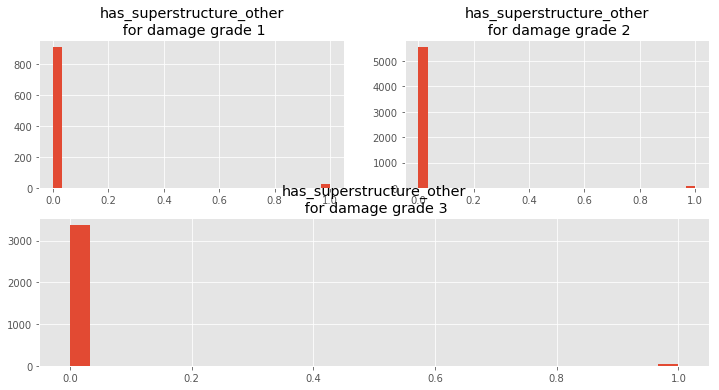

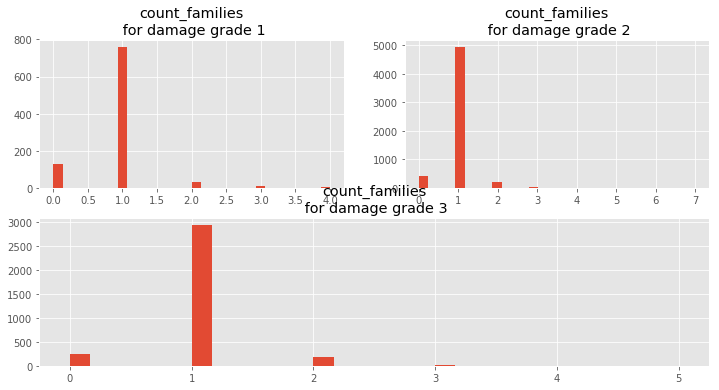

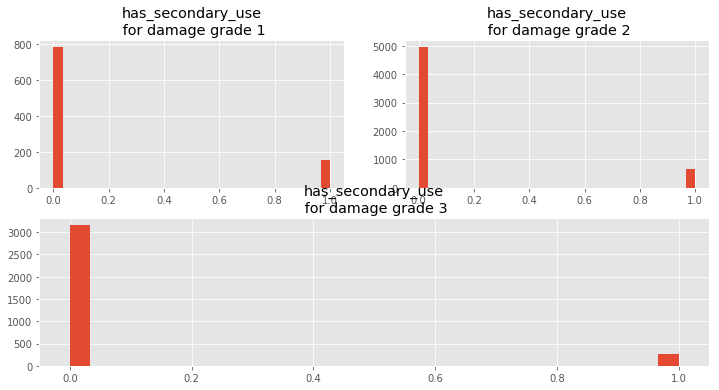

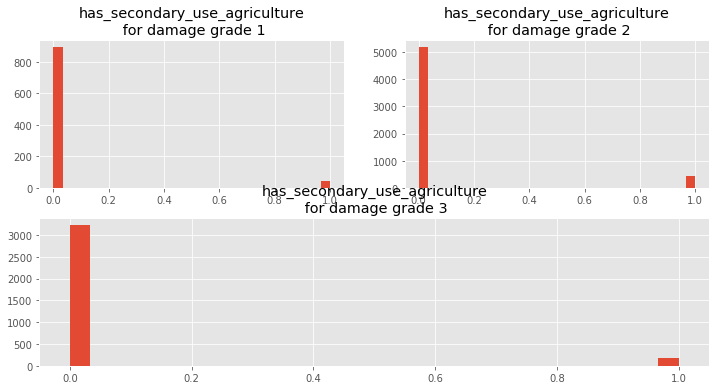

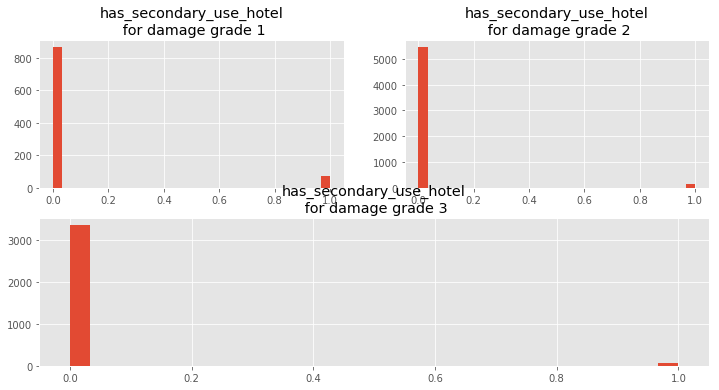

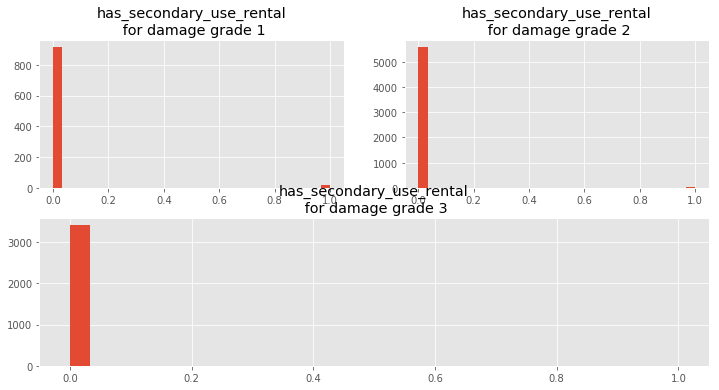

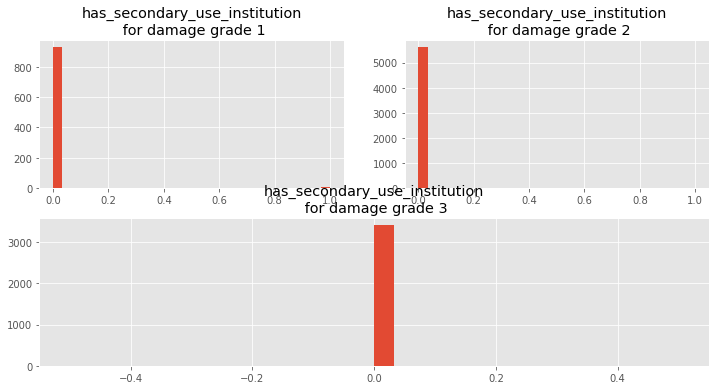

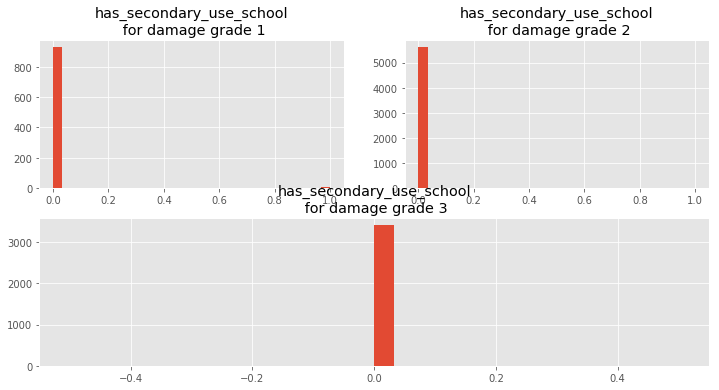

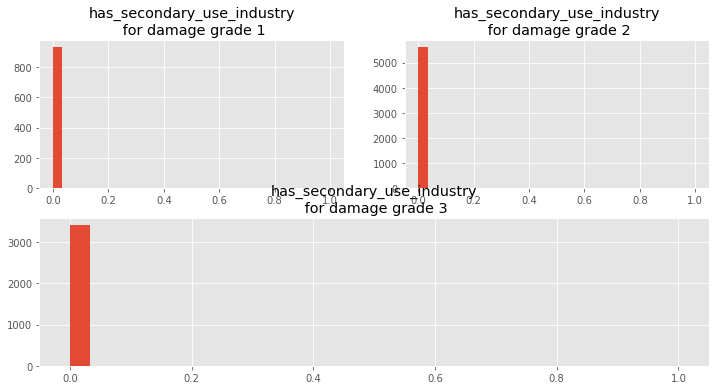

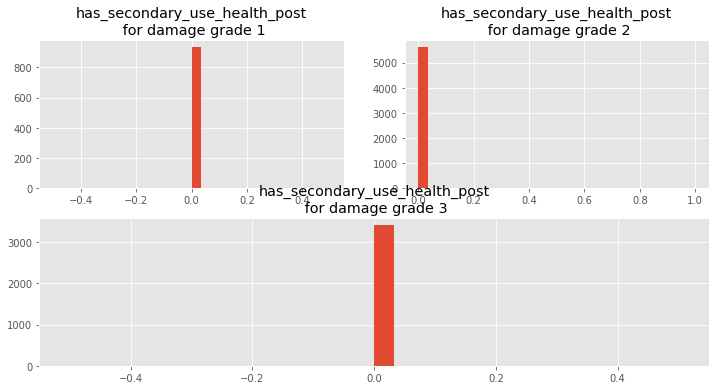

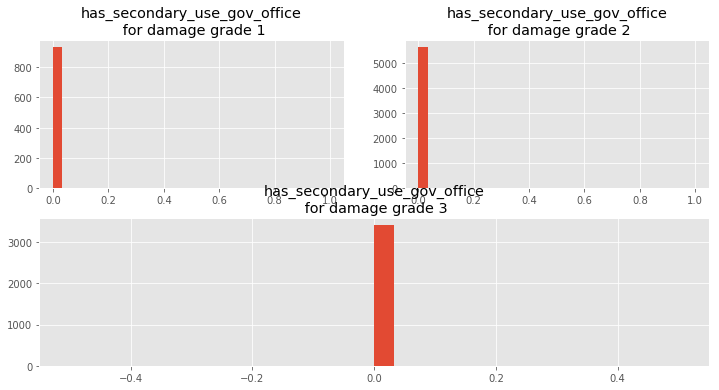

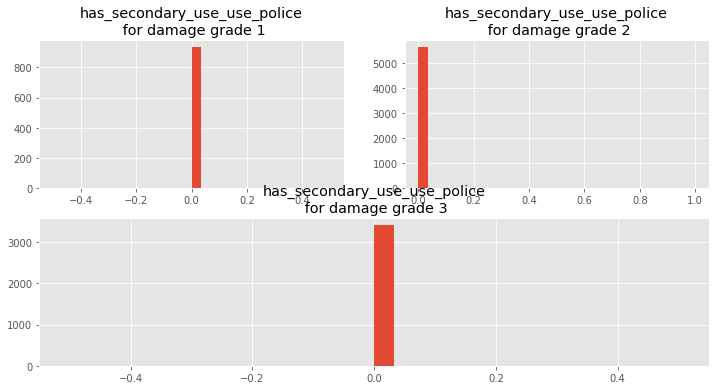

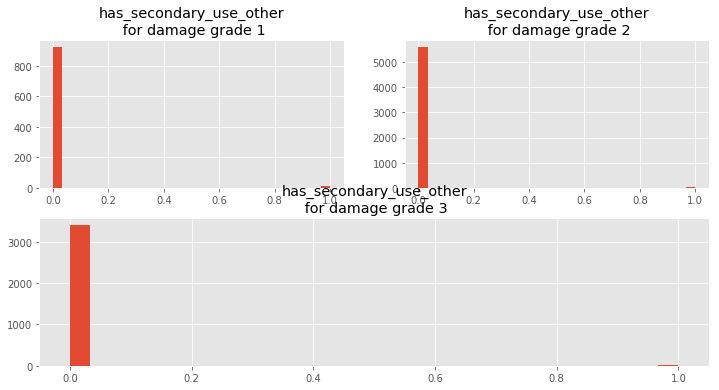

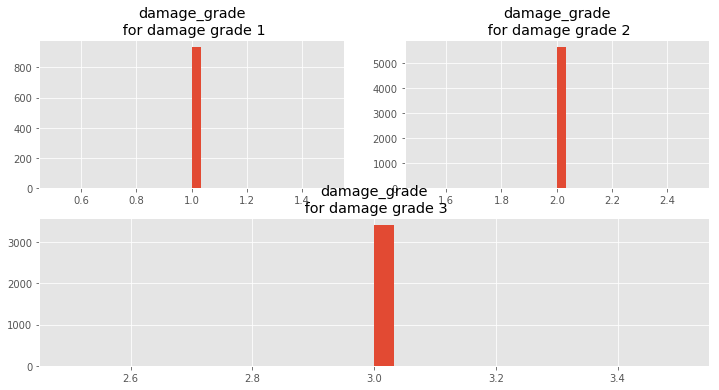

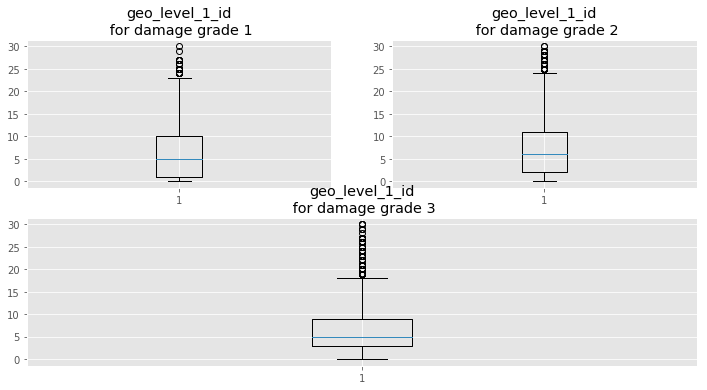

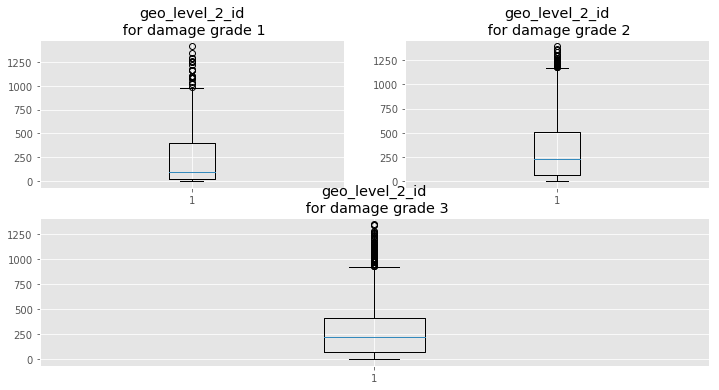

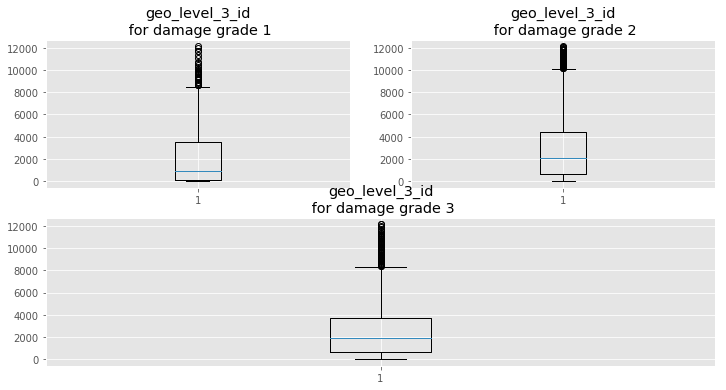

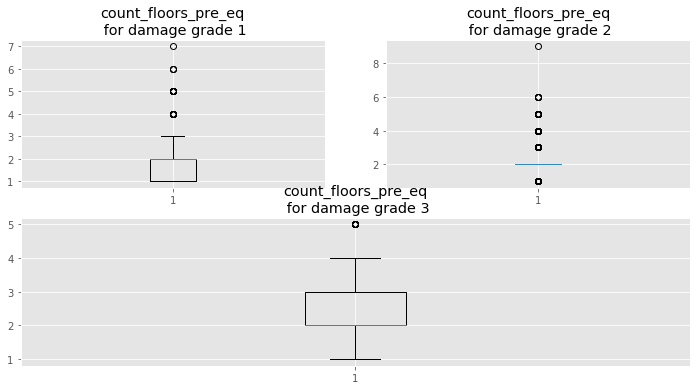

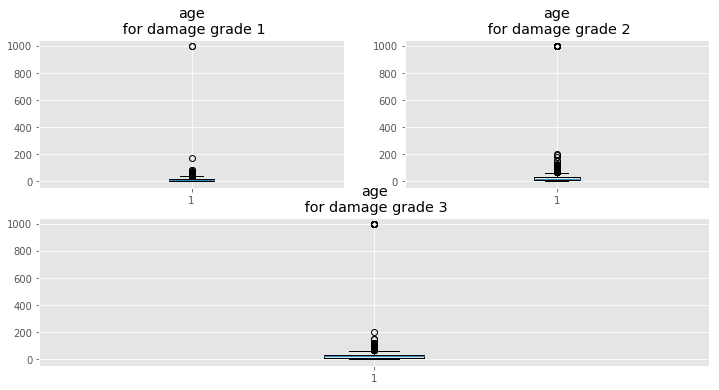

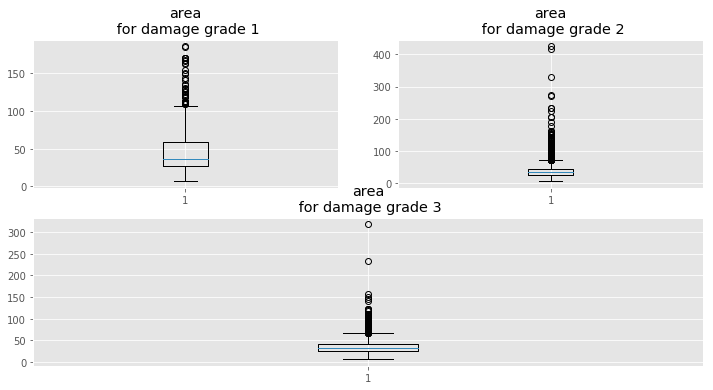

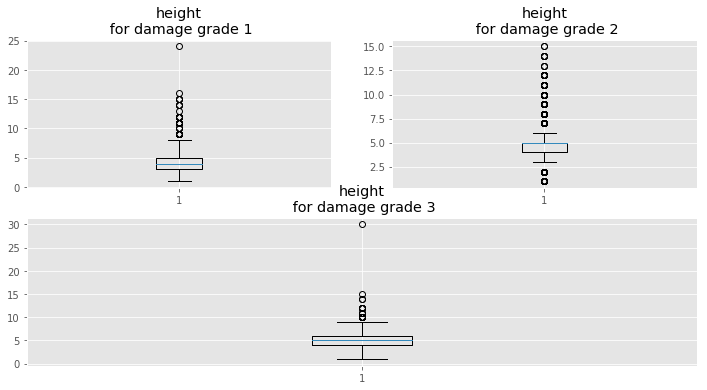

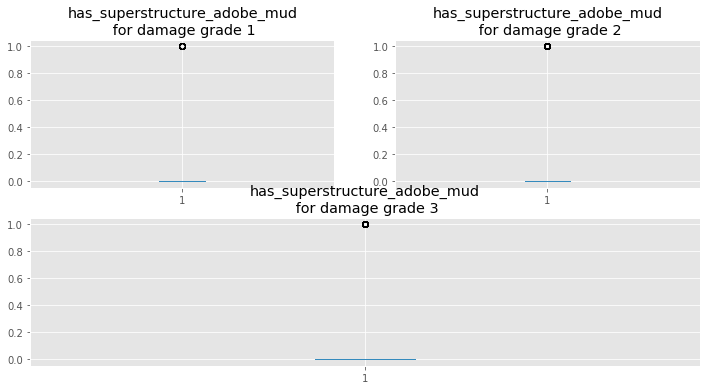

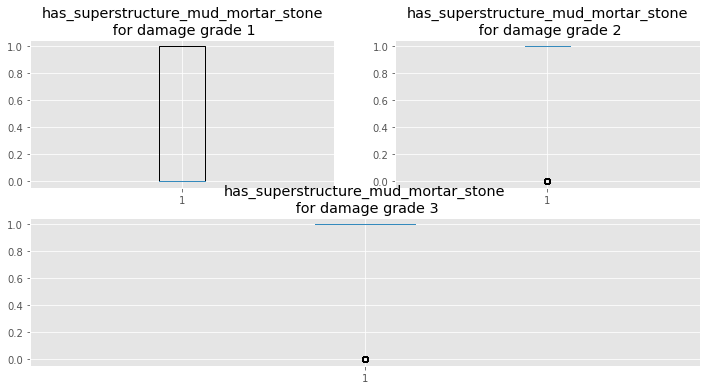

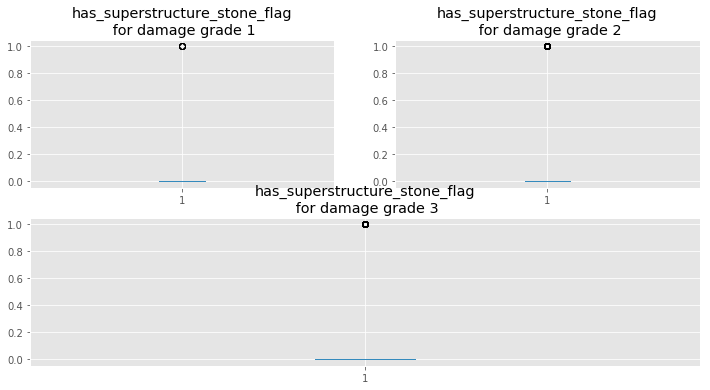

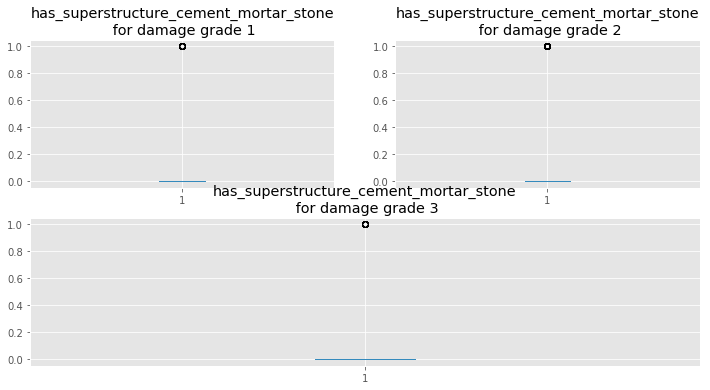

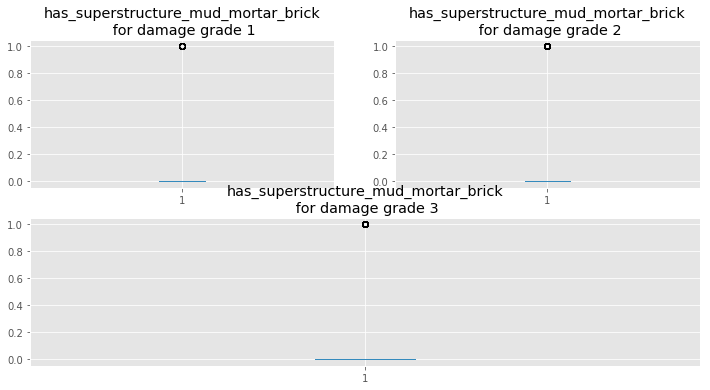

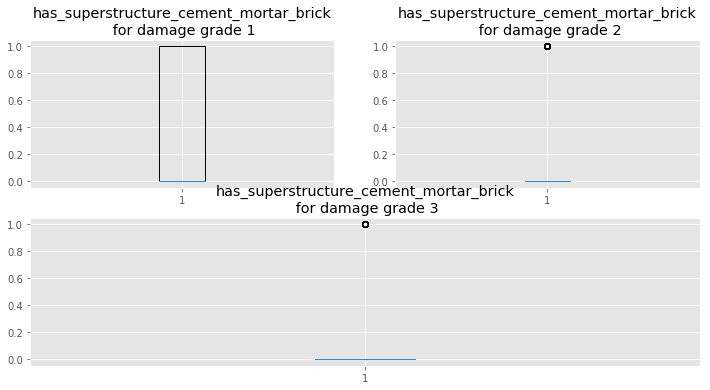

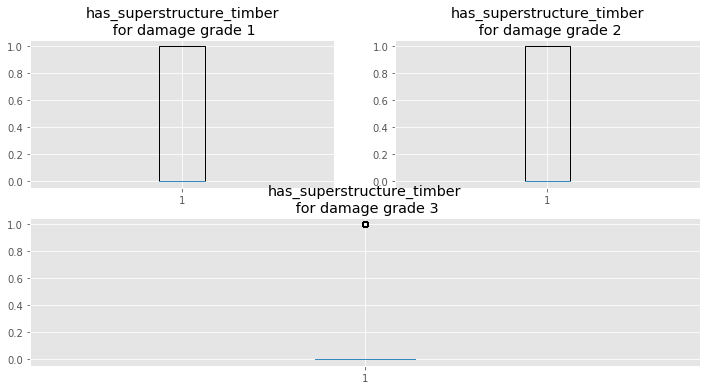

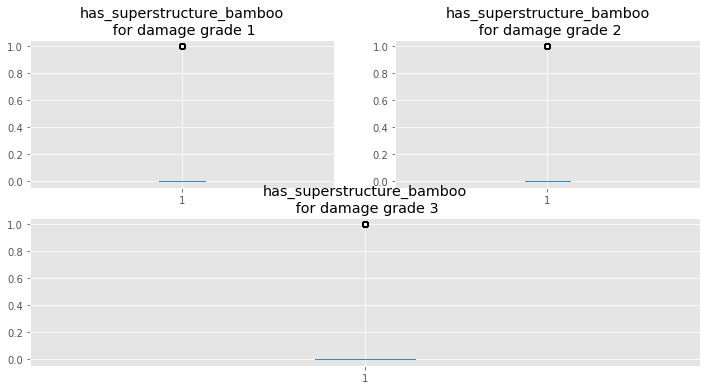

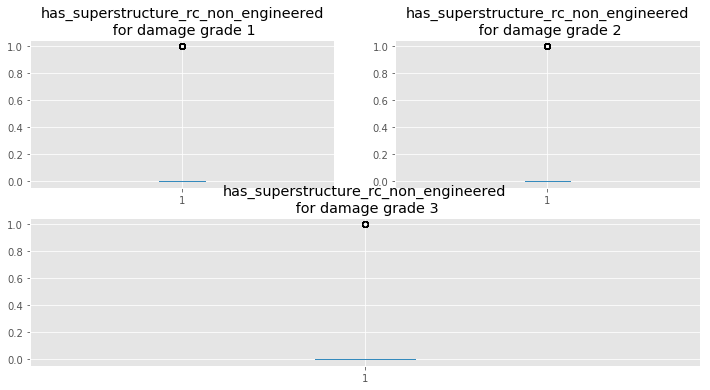

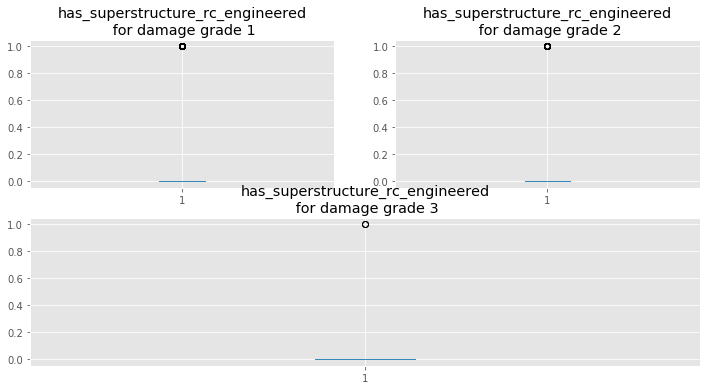

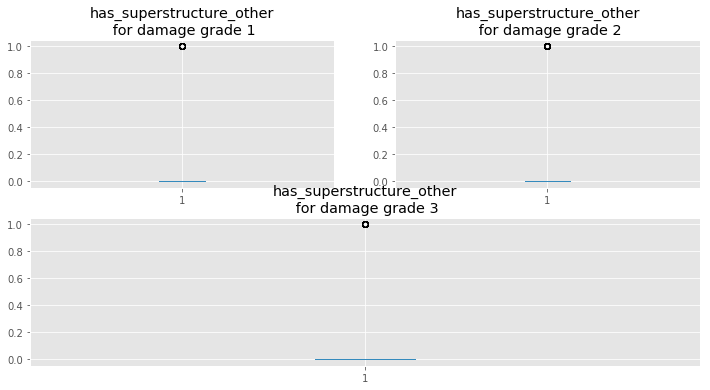

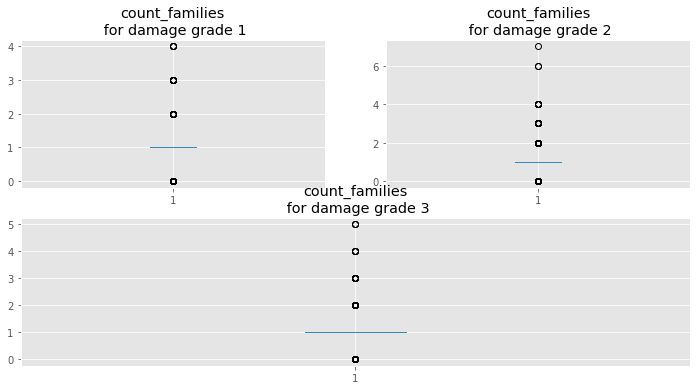

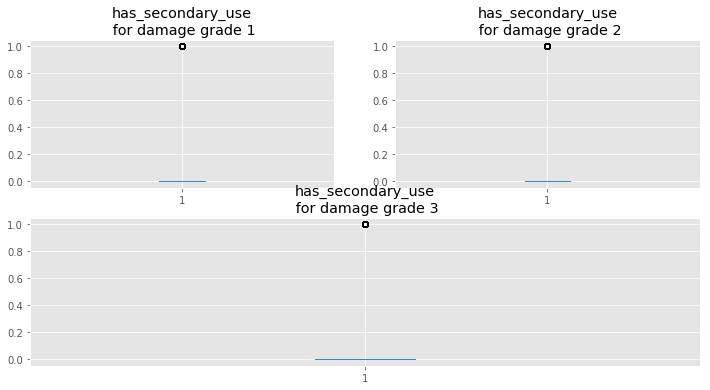

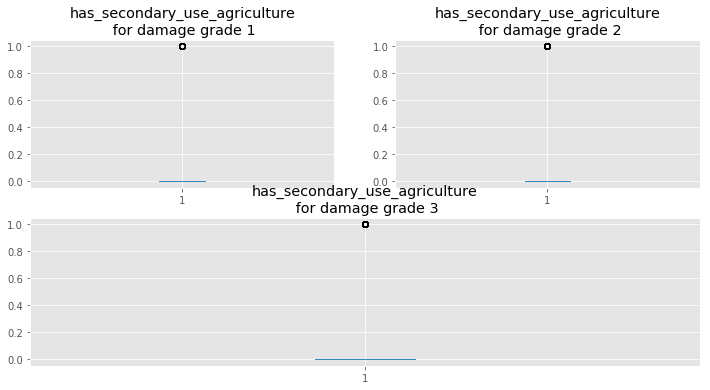

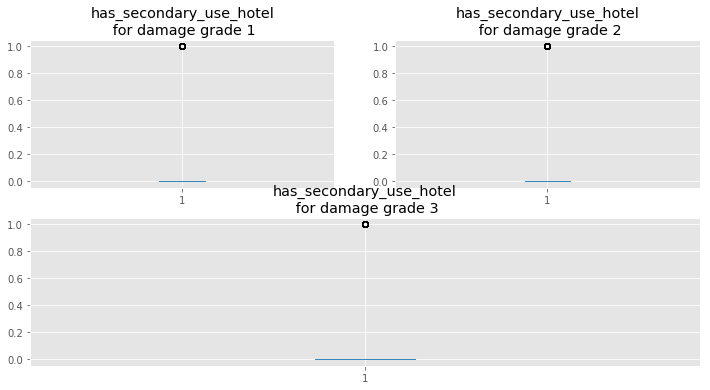

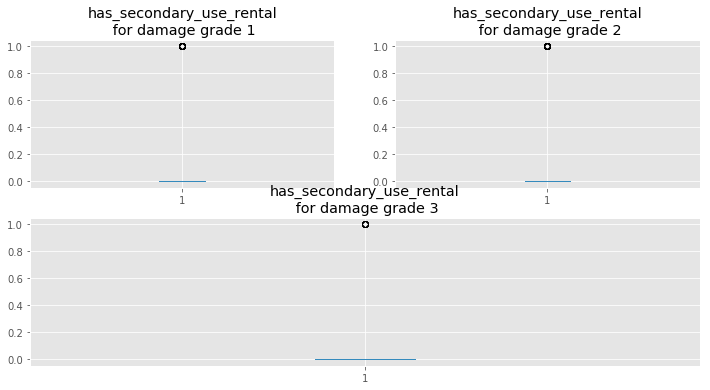

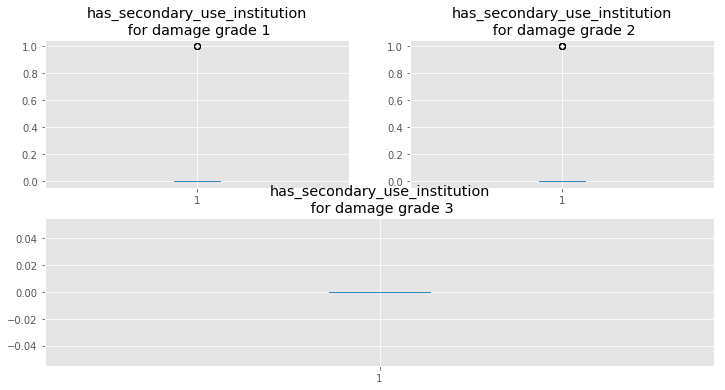

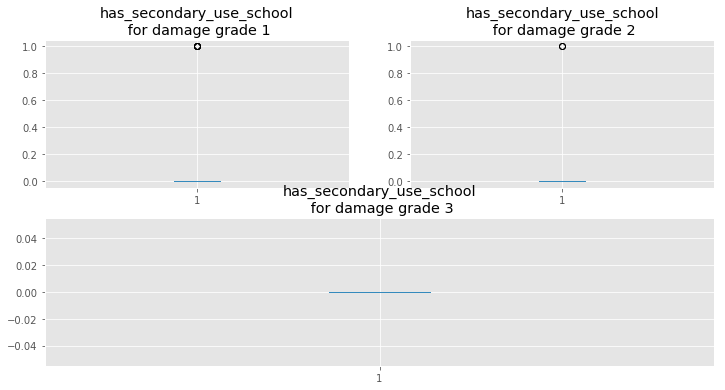

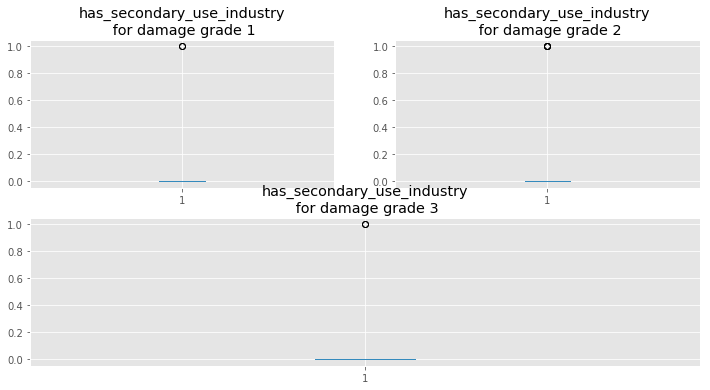

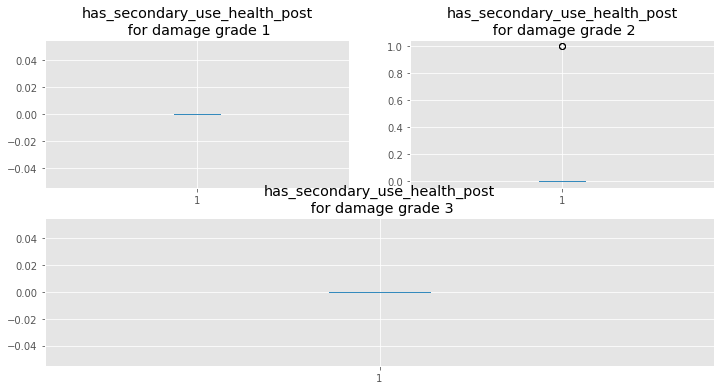

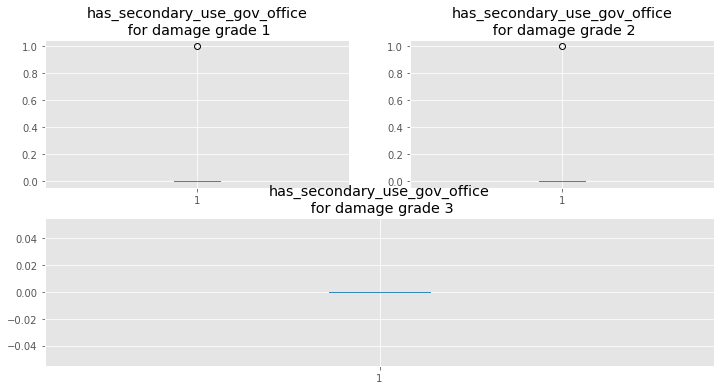

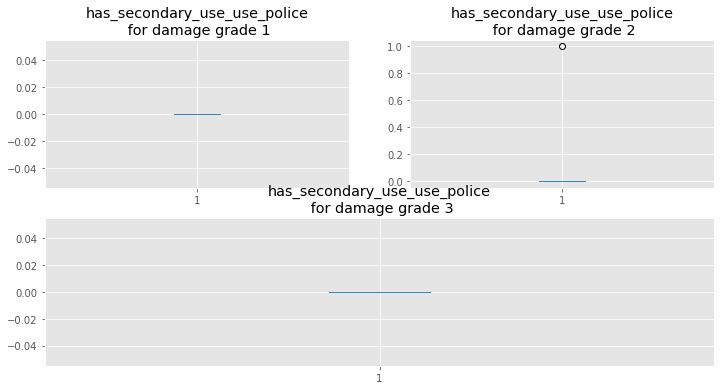

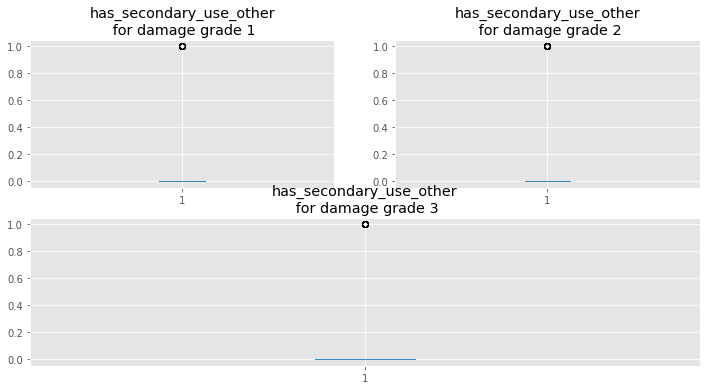

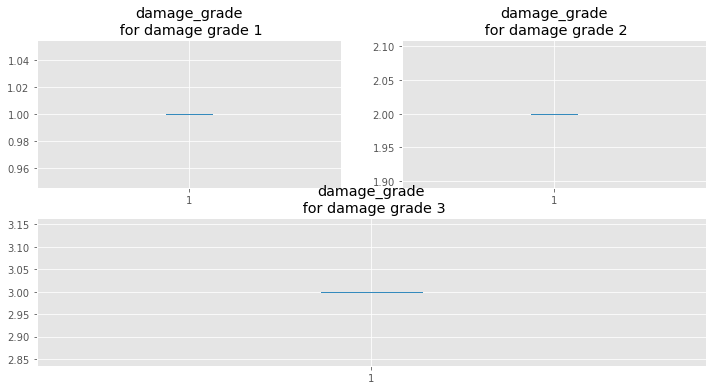

In [69]:
quake_bar(Xy)
quake_hist(Xy)
quake_box(Xy)


<Figure size 432x288 with 0 Axes>

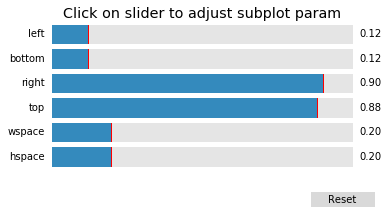

In [70]:
plt.subplot_tool()
plt.show()

***Trying again with taking out outliers



In [71]:

Xy.loc[Xy.age > 100, 'age'] = np.nan
Xy.loc[Xy.area > 199, 'area'] = np.nan
#Xy.loc[Xy.height > 12, 'height'] = np.nan
#Xy.loc[Xy.count_families > 3, 'count_families'] = np.nan
#Xy.loc[Xy.count_floors_pre_eq > 5, 'count_floors_pre_eq'] = np.nan
Xy.loc[Xy.geo_level_1_id == 0, 'geo_level_1_id'] = np.nan
Xy.loc[Xy.geo_level_2_id == 0, 'geo_level_2_id'] = np.nan
Xy.loc[Xy.geo_level_3_id == 0, 'geo_level_3_id'] = np.nan

In [72]:
#Xy=Xy.fillna(round(Xy.mean()),inplace=True)

In [73]:
Xy.fillna(round(Xy.mean()),inplace=True)

In [74]:
Xy['count_floors_pre_eq']=Xy.count_floors_pre_eq.astype(np.int64)
Xy['count_families']=Xy.count_families.astype(np.int64)
Xy['age']=Xy.age.astype(np.int64)
Xy['area']=Xy.area.astype(np.int64)
Xy['height']=Xy.height.astype(np.int64)
Xy['geo_level_1_id']=Xy.geo_level_1_id.astype(np.int64)
Xy['geo_level_2_id']=Xy.geo_level_2_id.astype(np.int64)
Xy['geo_level_3_id']=Xy.geo_level_3_id.astype(np.int64)
Xy['count_families']=Xy.count_families.astype(np.int64)
Xy['has_secondary_use']=Xy.has_secondary_use.astype(np.int64)

In [75]:
Xy.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area                                       int64
height                                     int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

In [76]:
Xy.describe()

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  \
count    10000.000000    10000.000000    10000.000000         10000.000000   
mean         7.858000      301.671700     2685.061900             2.146700   
std          5.805601      276.862216     2517.237116             0.736365   
min          1.000000        1.000000        1.000000             1.000000   
25%          3.000000       67.750000      615.000000             2.000000   
50%          7.000000      231.500000     1953.500000             2.000000   
75%         10.000000      466.000000     4158.000000             3.000000   
max         30.000000     1411.000000    12151.000000             9.000000   

                age          area        height  has_superstructure_adobe_mud  \
count  10000.000000  10000.000000  10000.000000                  10000.000000   
mean      21.219900     38.147000      4.653100                      0.089700   
std       18.649947     19.373191      1.792842                      0.285766   
min        0.000000      6.000000      1.000000                      0.000000   
25%       10.000000     26.000000      4.000000                      0.000000   
50%       15.000000     34.000000      5.000000                      0.000000   
75%       30.000000     44.000000      5.000000                      0.000000   
max      100.000000    191.000000     30.000000                      1.000000   

       has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
count                         10000.000000                    10000.00000   
mean                              0.762600                        0.02990   
std                               0.425511                        0.17032   
min                               0.000000                        0.00000   
25%                               1.000000                        0.00000   
50%                               1.000000                        0.00000   
75%                               1.000000                        0.00000   
max                               1.000000                        1.00000   

           ...       has_secondary_use_hotel  has_secondary_use_rental  \
count      ...                  10000.000000              10000.000000   
mean       ...                      0.029400                  0.006400   
std        ...                      0.168933                  0.079748   
min        ...                      0.000000                  0.000000   
25%        ...                      0.000000                  0.000000   
50%        ...                      0.000000                  0.000000   
75%        ...                      0.000000                  0.000000   
max        ...                      1.000000                  1.000000   

       has_secondary_use_institution  has_secondary_use_school  \
count                    10000.00000               10000.00000   
mean                         0.00070                   0.00070   
std                          0.02645                   0.02645   
min                          0.00000                   0.00000   
25%                          0.00000                   0.00000   
50%                          0.00000                   0.00000   
75%                          0.00000                   0.00000   
max                          1.00000                   1.00000   

       has_secondary_use_industry  has_secondary_use_health_post  \
count                10000.000000                   10000.000000   
mean                     0.000800                       0.000200   
std                      0.028274                       0.014141   
min                      0.000000                       0.000000   
25%                      0.000000                       0.000000   
50%                      0.000000                       0.000000   
75%                      0.000000                       0.000000   
max                      1.000000                       1.000000   

     

In [77]:
Xy.groupby(['count_families']).count()

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
count_families                                                   
0                          803             803             803   
1                         8672            8672            8672   
2                          433             433             433   
3                           70              70              70   
4                           16              16              16   
5                            3               3               3   
6                            2               2               2   
7                            1               1               1   

                count_floors_pre_eq   age  area  height  \
count_families                                            
0                               803   803   803     803   
1                              8672  8672  8672    8672   
2                               433   433   433     433   
3                                70    70    70      70   
4                                16    16    16      16   
5                                 3     3     3       3   
6                                 2     2     2       2   
7                                 1     1     1       1   

                land_surface_condition  foundation_type  roof_type  \
count_families                                                       
0                                  803              803        803   
1                                 8672             8672       8672   
2                                  433              433        433   
3                                   70               70         70   
4                                   16               16         16   
5                                    3                3          3   
6                                    2                2          2   
7                                    1                1          1   

                    ...       has_secondary_use_hotel  \
count_families      ...                                 
0                   ...                           803   
1                   ...                          8672   
2                   ...                           433   
3                   ...                            70   
4                   ...                            16   
5                   ...                             3   
6                   ...                             2   
7                   ...                             1   

                has_secondary_use_rental  has_secondary_use_institution  \
count_families                                                            
0                                    803                            803   
1                                   8672                           8672   
2                                    433                            433   
3                                     70                             70   
4                                     16                             16   
5                                      3                              3   
6                                      2                              2   
7                                      1                              1   

                has_secondary_use_school  has_secondary_use_industry  \
count_families                                                         
0                                    803                         803   
1                                   8672                        8672   
2                                    433                         433   
3                                     70                          70   
4                                     16                          16   
5                                      3                           3   
6                                      2                           2   
7                                      1                           1   

                has_

In [78]:
Xy.groupby(['height']).count()

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  \
height                                                                        
1                  123             123             123                  123   
2                  813             813             813                  813   
3                 1507            1507            1507                 1507   
4                 2298            2298            2298                 2298   
5                 2820            2820            2820                 2820   
6                 1355            1355            1355                 1355   
7                  561             561             561                  561   
8                  216             216             216                  216   
9                  144             144             144                  144   
10                  53              53              53                   53   
11                  43              43              43                   43   
12                  42              42              42                   42   
13                   4               4               4                    4   
14                  11              11              11                   11   
15                   7               7               7                    7   
16                   1               1               1                    1   
24                   1               1               1                    1   
30                   1               1               1                    1   

         age  area  land_surface_condition  foundation_type  roof_type  \
height                                                                   
1        123   123                     123              123        123   
2        813   813                     813              813        813   
3       1507  1507                    1507             1507       1507   
4       2298  2298                    2298             2298       2298   
5       2820  2820                    2820             2820       2820   
6       1355  1355                    1355             1355       1355   
7        561   561                     561              561        561   
8        216   216                     216              216        216   
9        144   144                     144              144        144   
10        53    53                      53               53         53   
11        43    43                      43               43         43   
12        42    42                      42               42         42   
13         4     4                       4                4          4   
14        11    11                      11               11         11   
15         7     7                       7                7          7   
16         1     1                       1                1          1   
24         1     1                       1                1          1   
30         1     1                       1                1          1   

        ground_floor_type      ...       has_secondary_use_hotel  \
height                         ...                                 
1                     123      ...                           123   
2                     813      ...                           813   
3                    1507      ...                          1507   
4                    2298      ...                          2298   
5                    2820      ...                          2820   
6                    1355      ...                          1355   
7                     561      ...                           561   
8                     216      ...                           216   
9                     144      ...                           144   
10                     53      ...                            53   
11                     43      ...                            43   
12                     42      ...                            

In [79]:
#data_points=Xy.loc[:,('geo_level_1_id','geo_level_2_id', 'geo_level_3_id','count_floors_pre_eq','age','area','height', 'count_families', 'has_superstructure_mud_mortar_stone','has_superstructure_adobe_mud', 'has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution', 'has_secondary_use_other','damage_grade')].copy()
data_points1 = Xy.loc[:,('geo_level_1_id','geo_level_2_id', 'geo_level_3_id', 'damage_grade')].copy()
data_points2= Xy.loc[:,('count_floors_pre_eq','age','area','height', 'damage_grade','count_families')].copy()
data_points3= Xy.loc[:,('has_superstructure_mud_mortar_stone','has_superstructure_adobe_mud', 'has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution', 'has_secondary_use_other','damage_grade')].copy()

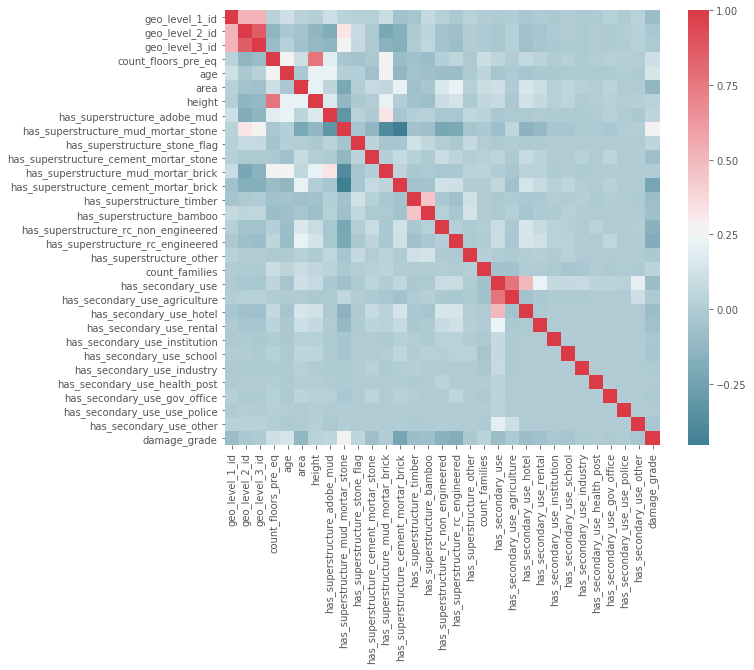

In [80]:
f, ax = plt.subplots(figsize=(10, 8))
corr = Xy.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000029CD00F0>,
      dtype=object)

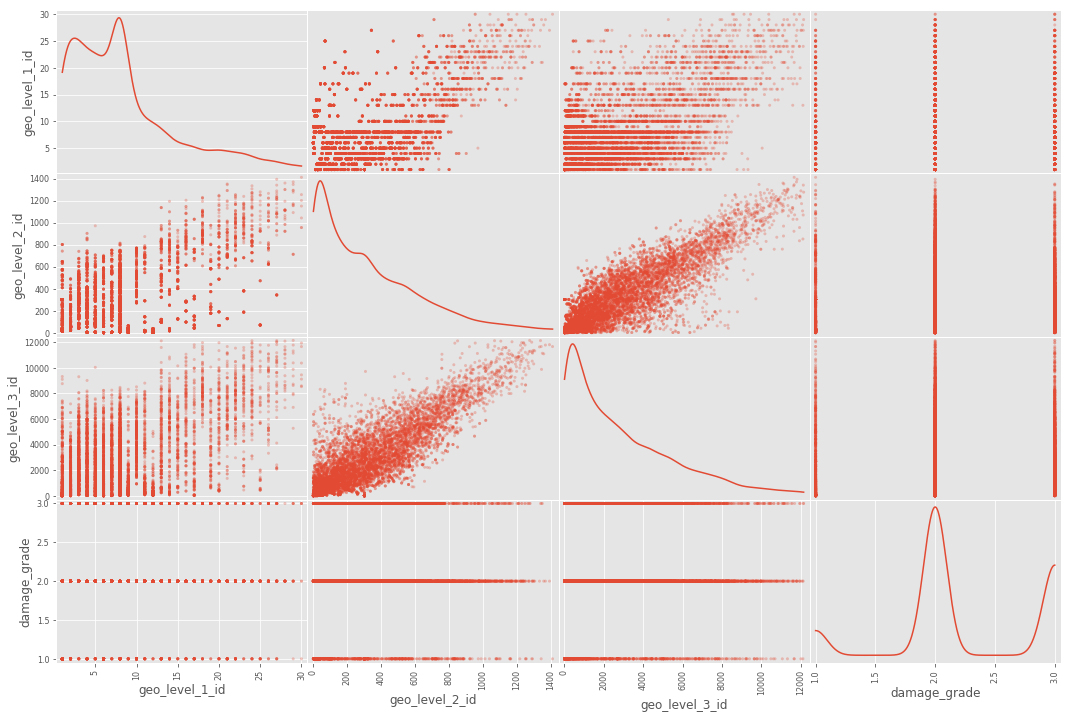

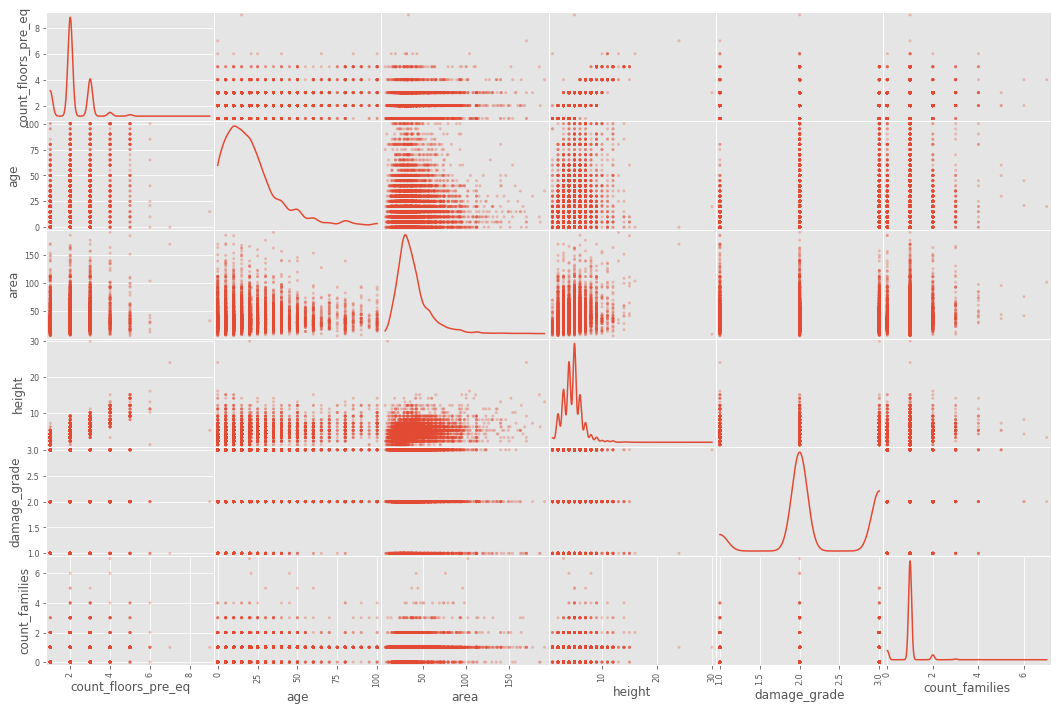

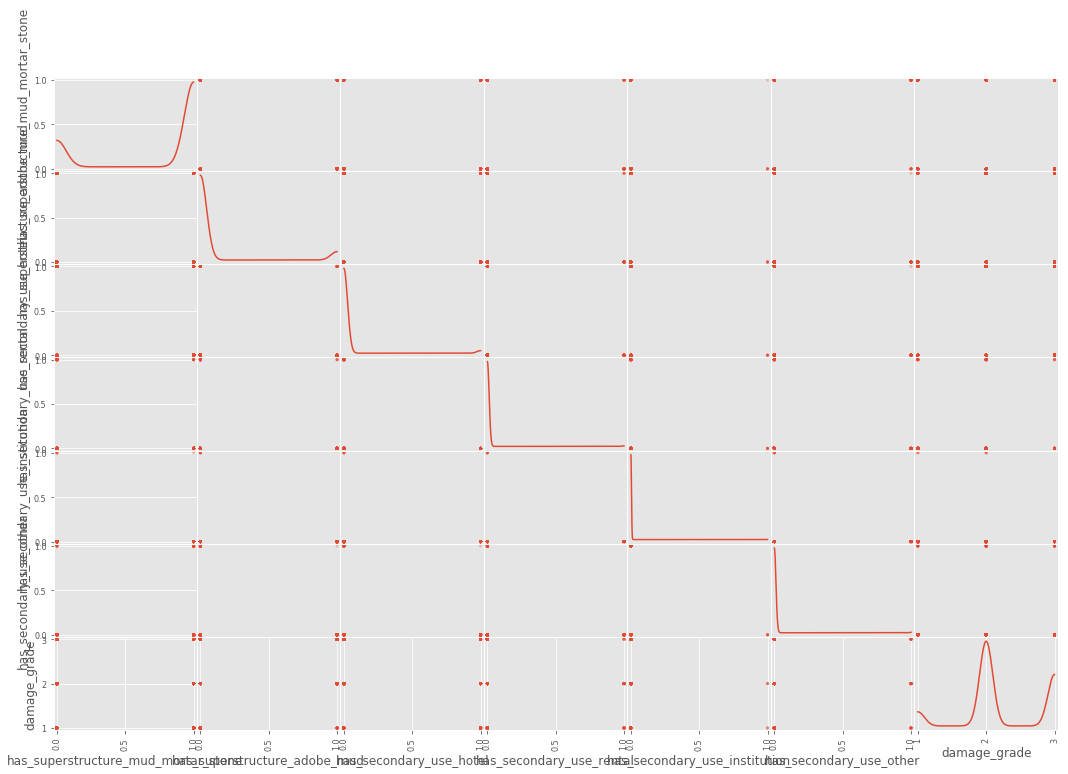

In [81]:
pd.plotting.scatter_matrix(data_points1, alpha = 0.3, figsize = (18,12), diagonal = 'kde')
pd.plotting.scatter_matrix(data_points2, alpha = 0.3, figsize = (18,12), diagonal = 'kde')
pd.plotting.scatter_matrix(data_points3, alpha = 0.3, figsize = (18,12), diagonal = 'kde')

**Pairplots 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


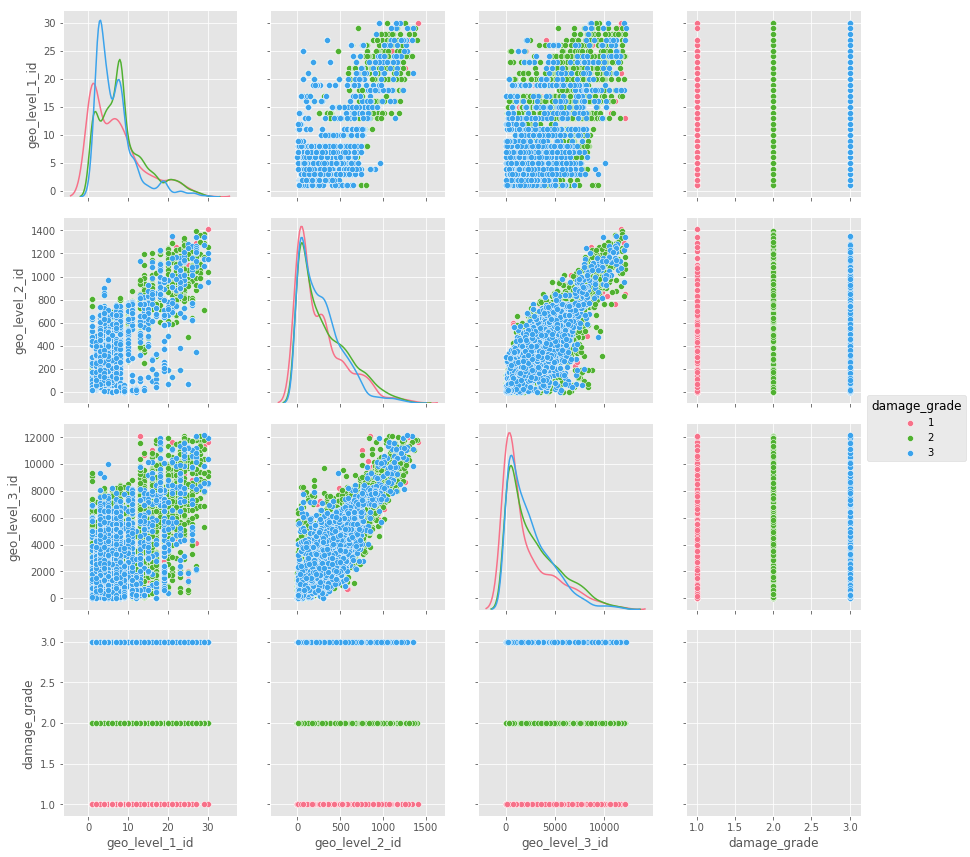

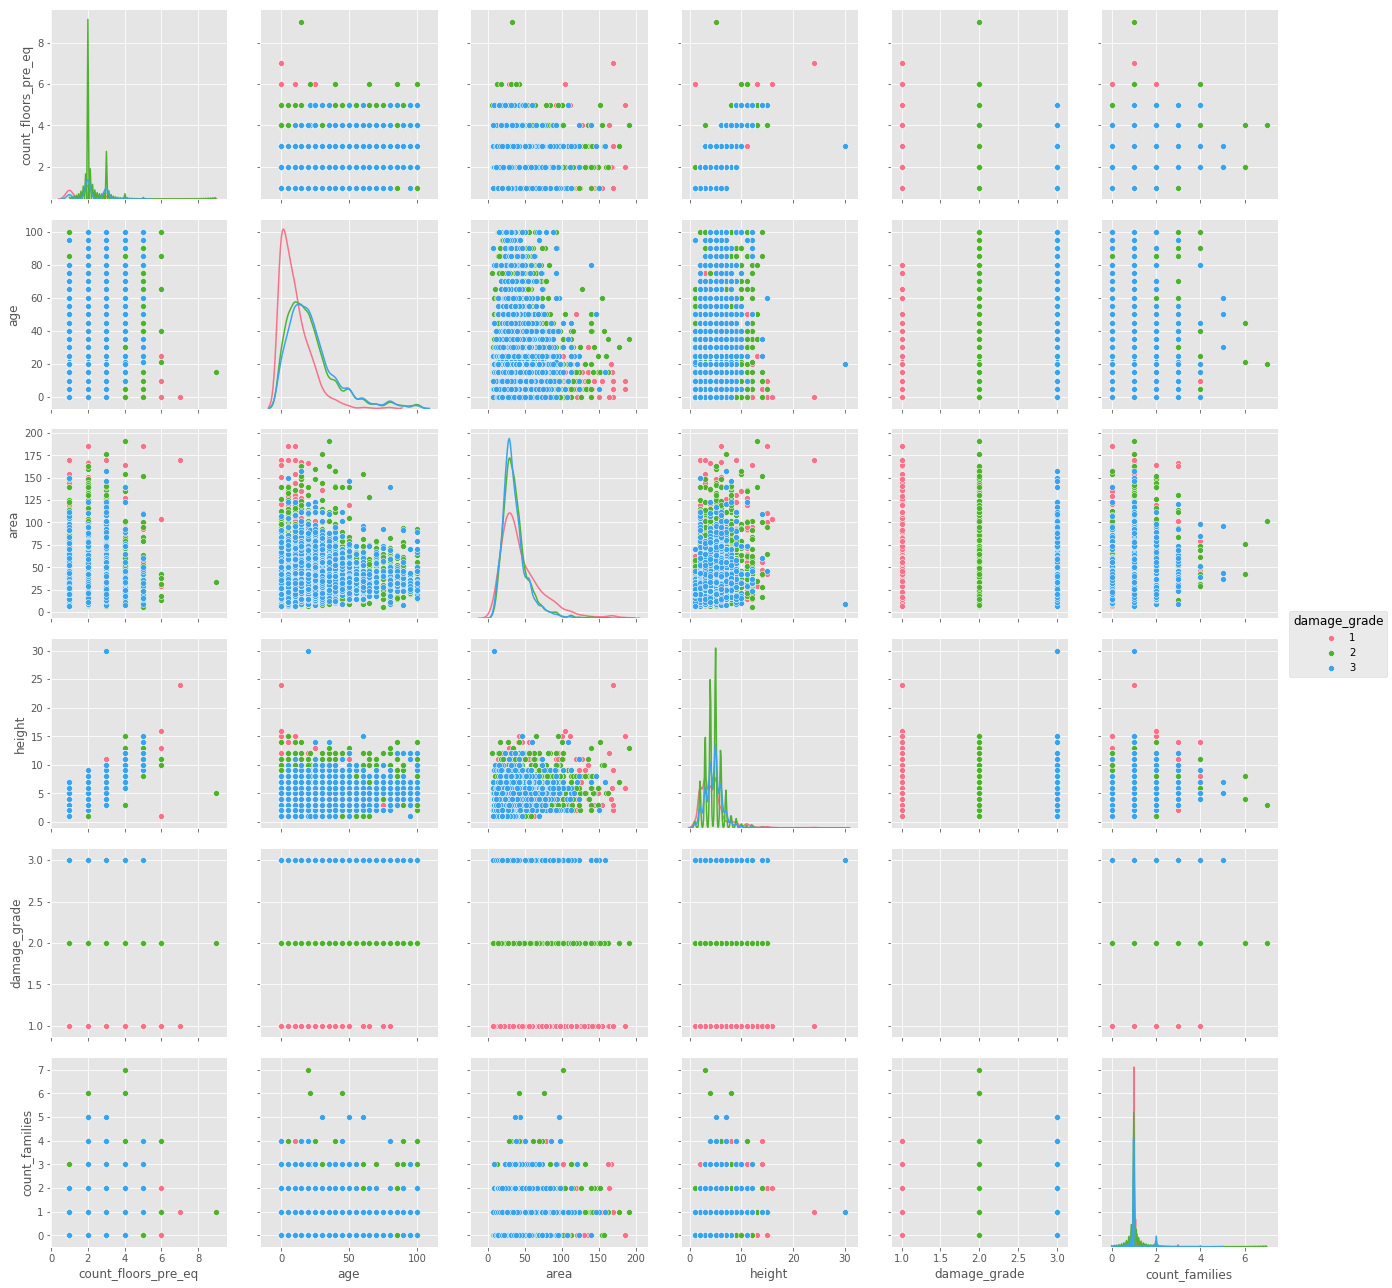

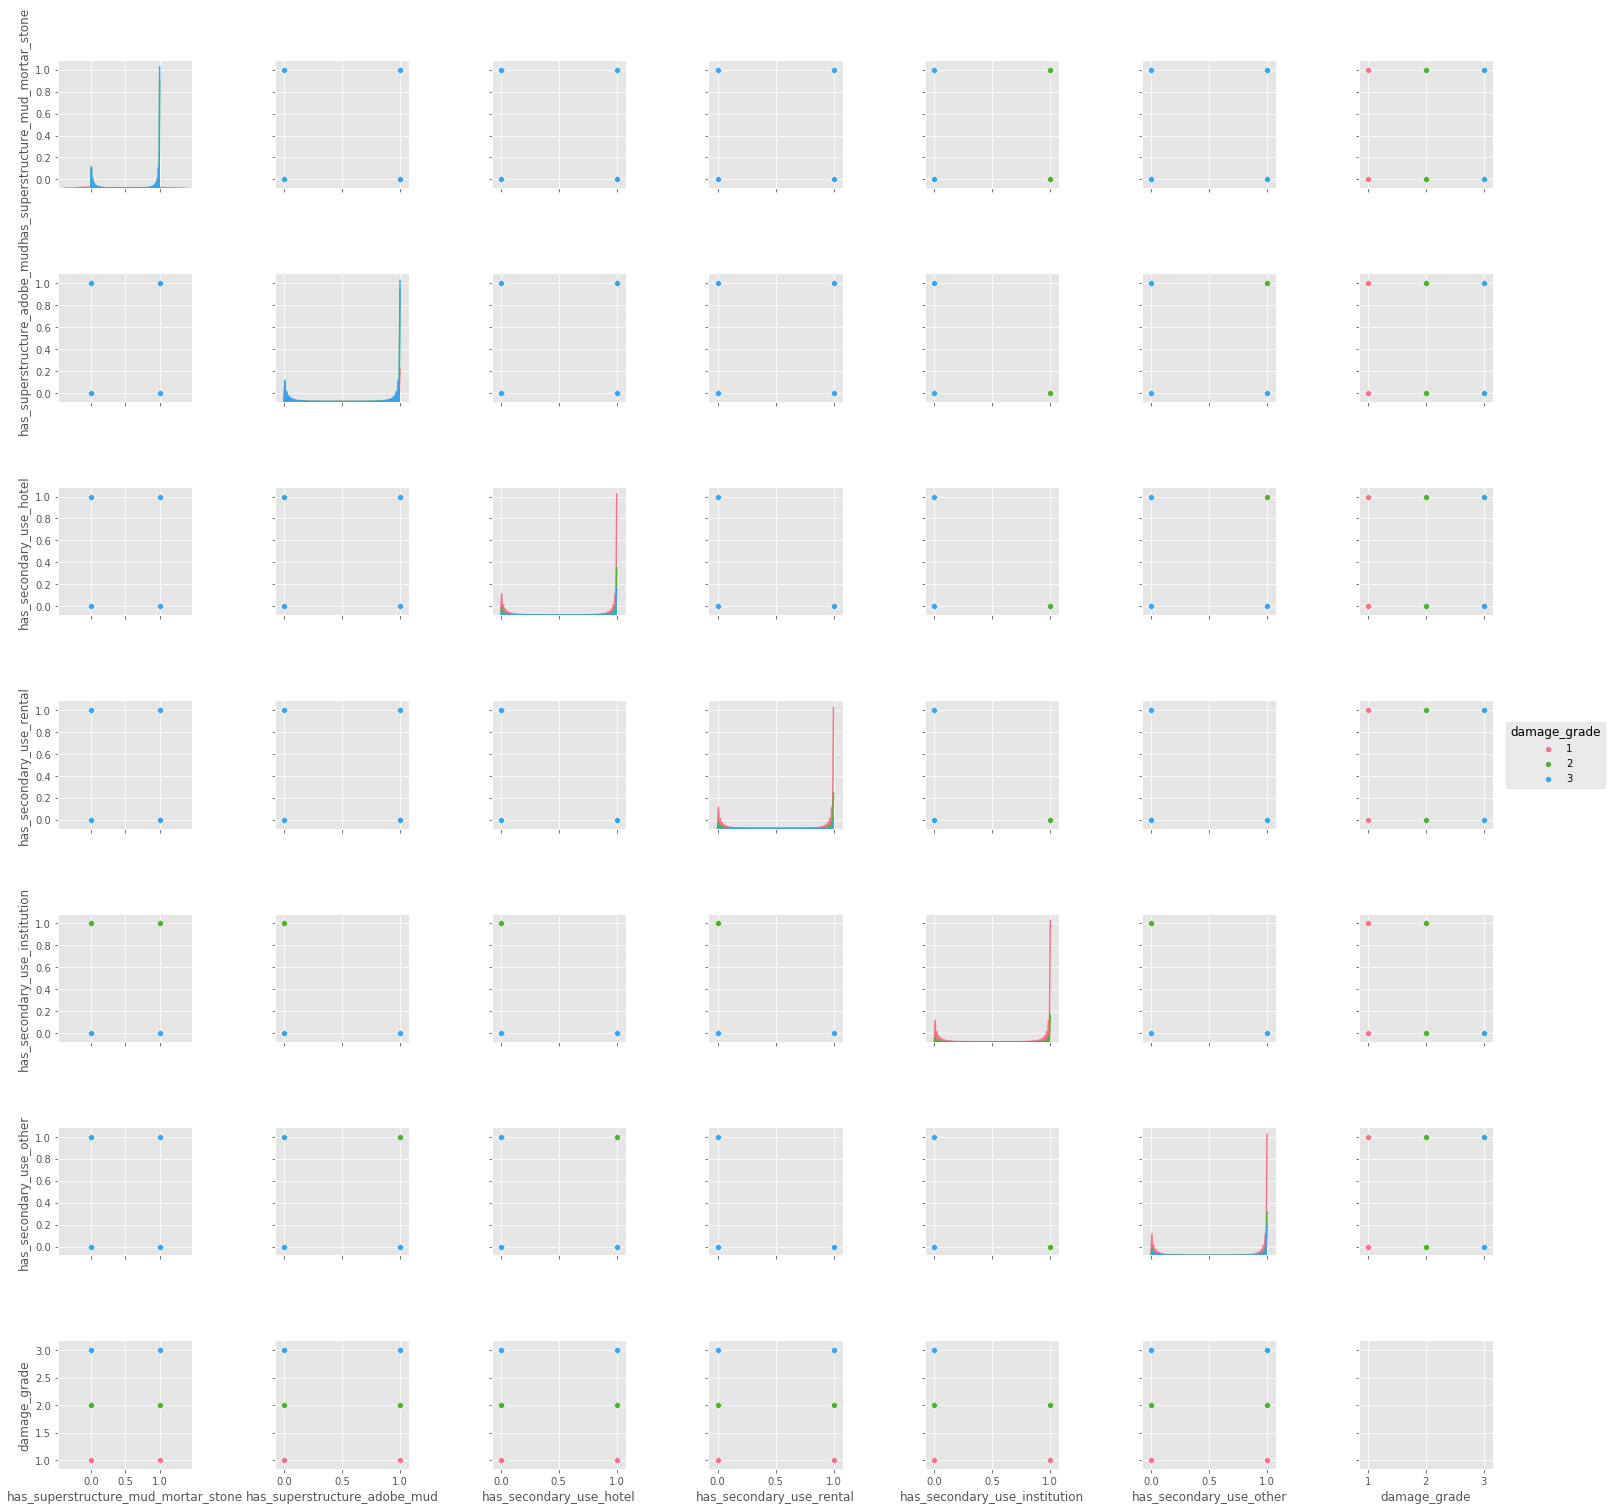

In [82]:
sns.pairplot(data_points1,hue='damage_grade', diag_kind="kde", size=3, palette='husl')
sns.pairplot(data_points2,hue='damage_grade', diag_kind="kde", size=3, palette='husl')
sns.pairplot(data_points3,hue='damage_grade', diag_kind="kde", size=3, palette='husl')

**Bars, Histograms, Box Charts

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\An

'Done'

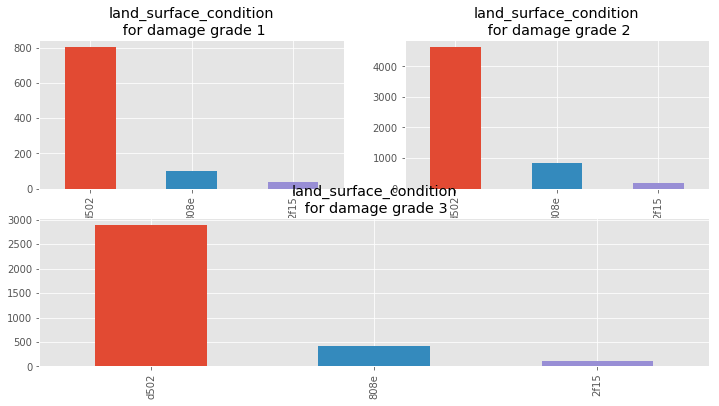

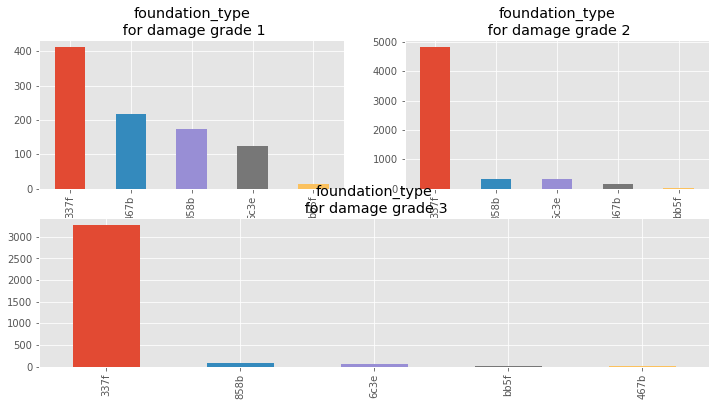

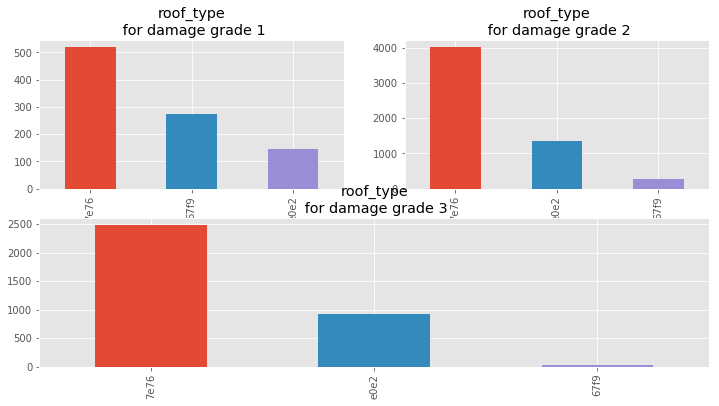

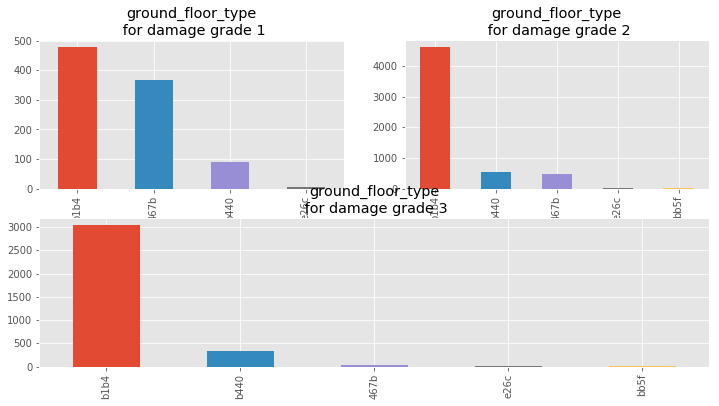

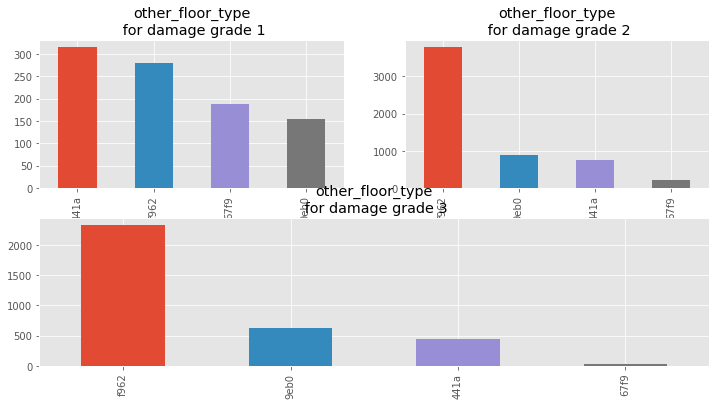

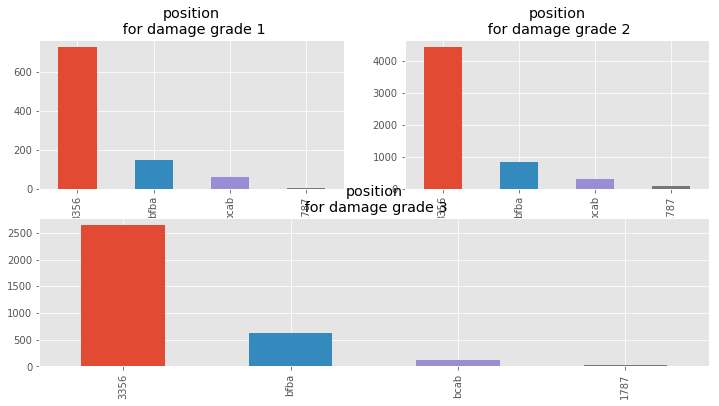

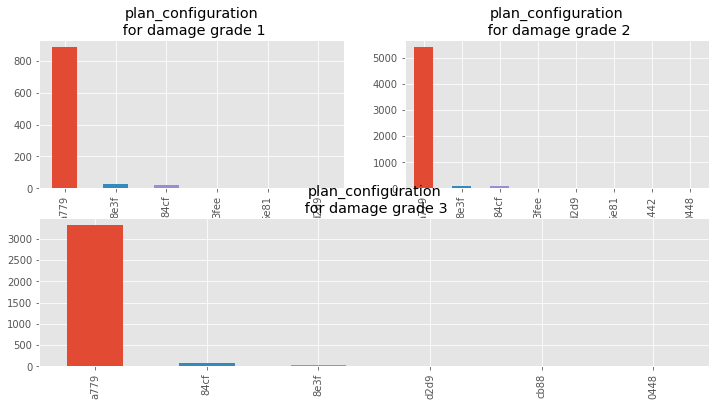

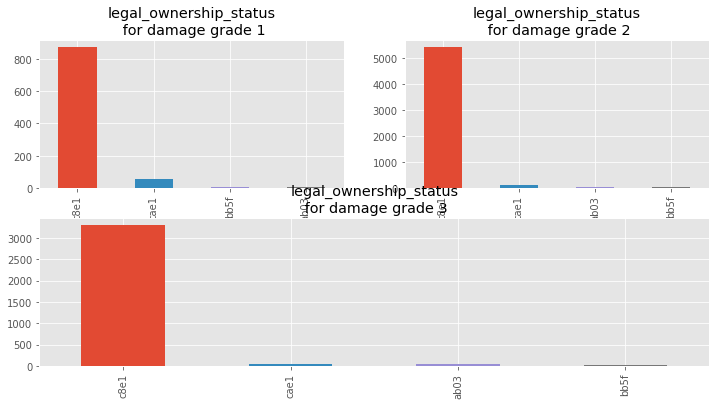

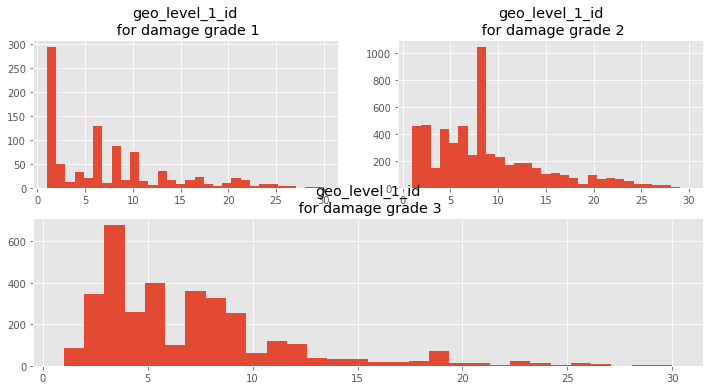

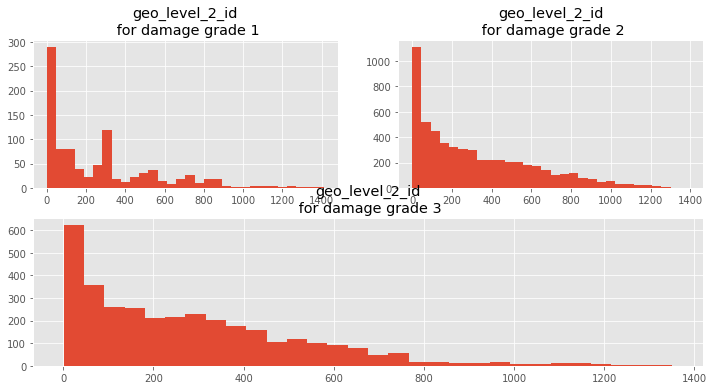

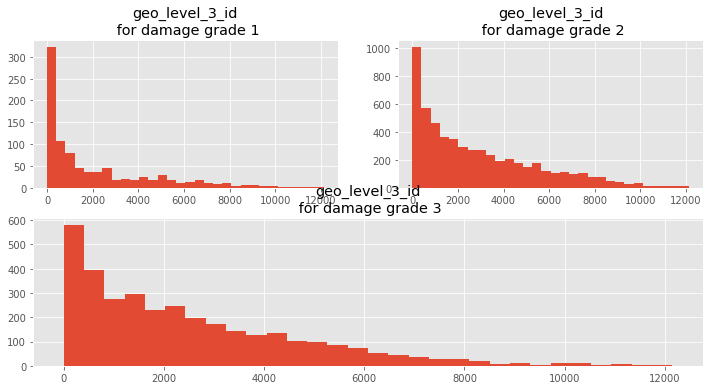

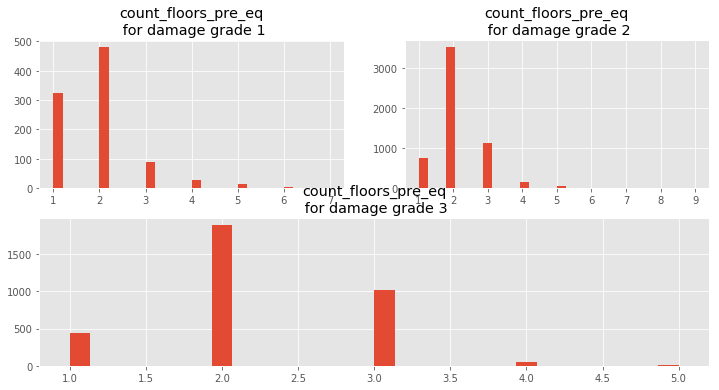

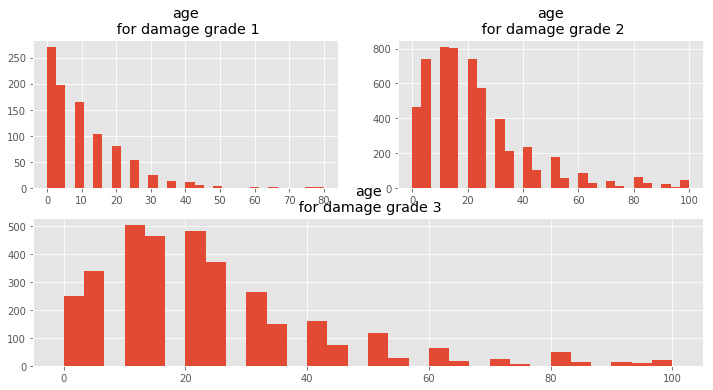

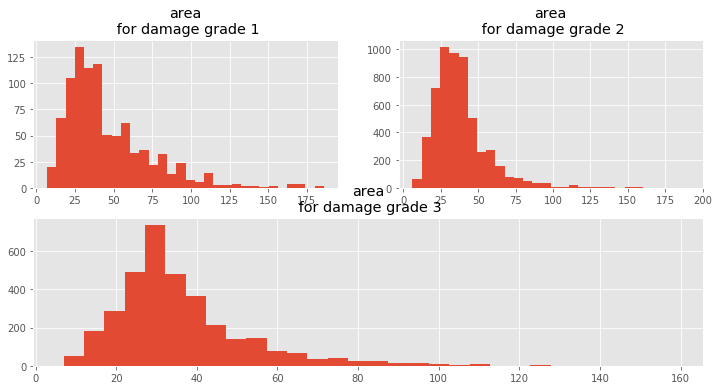

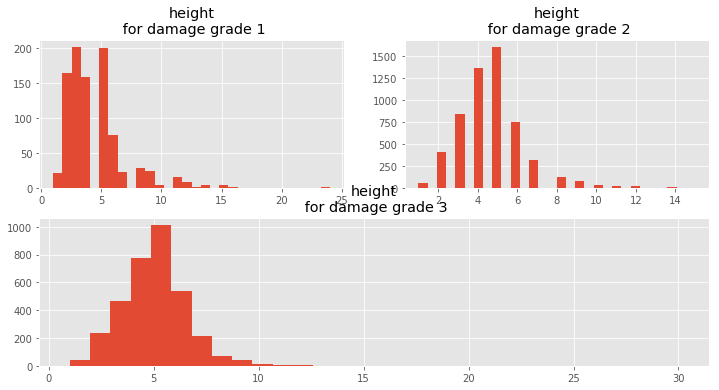

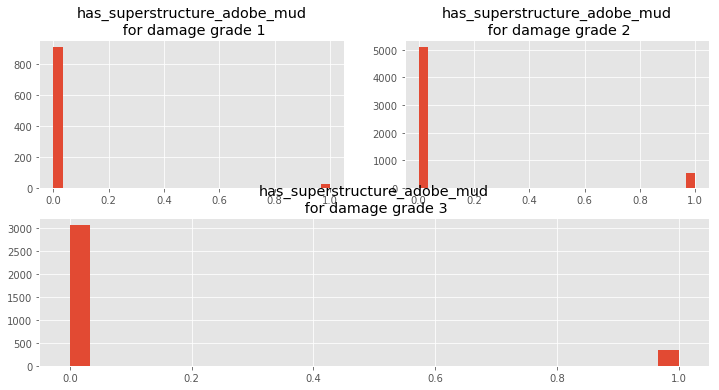

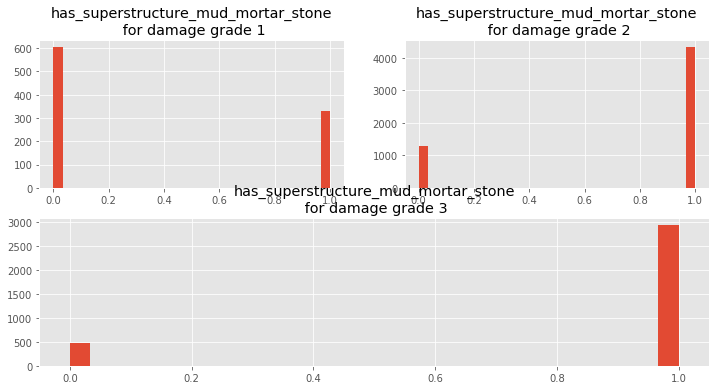

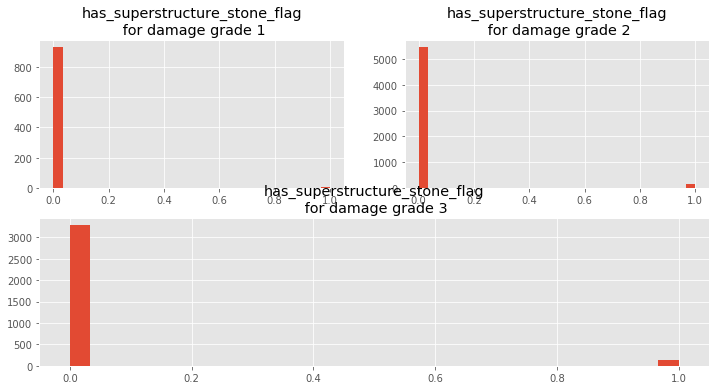

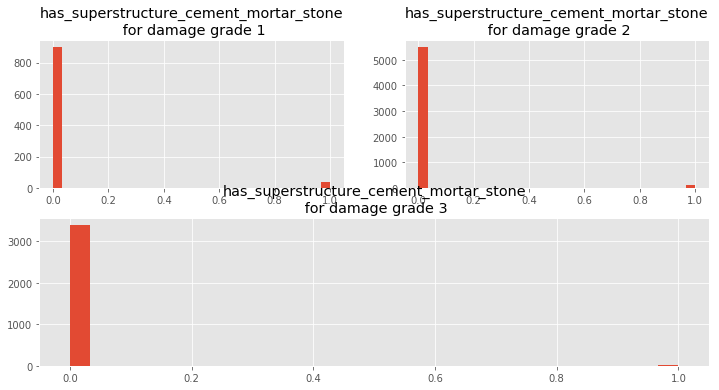

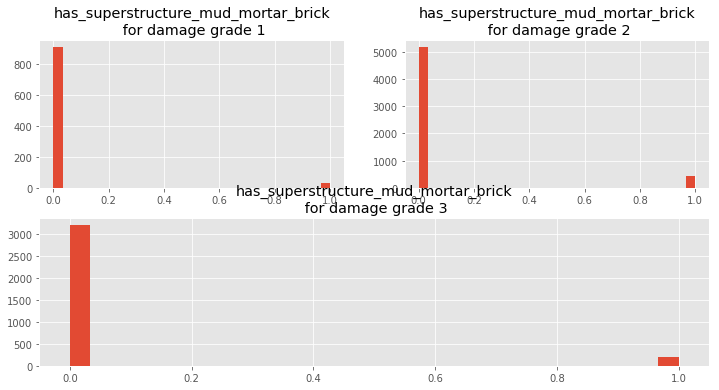

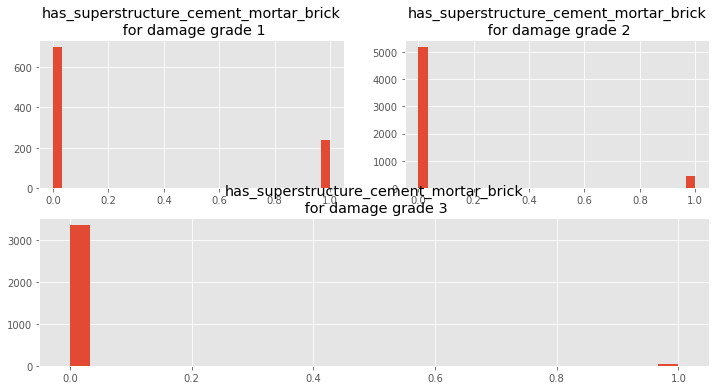

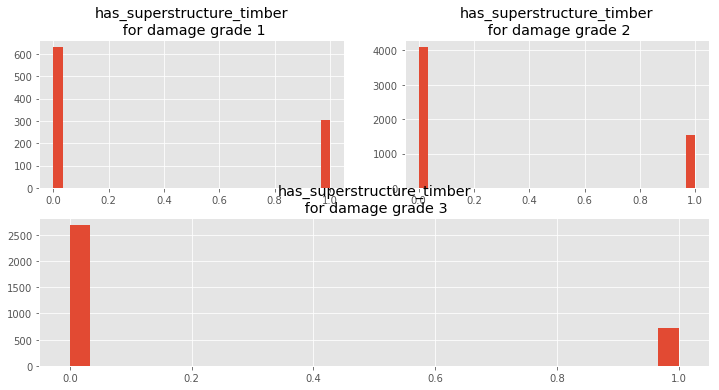

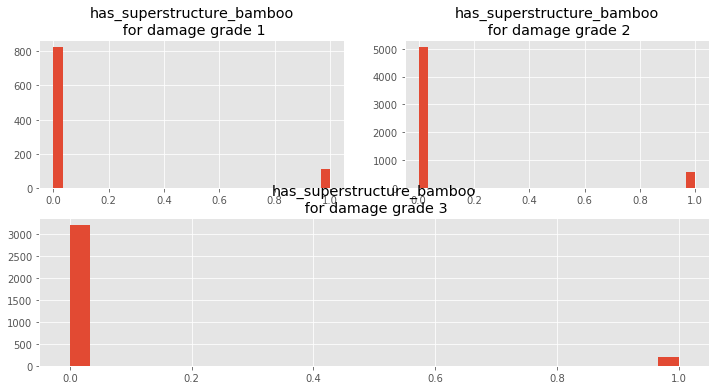

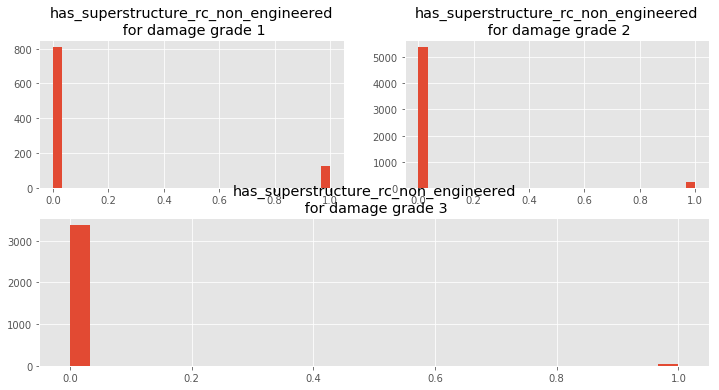

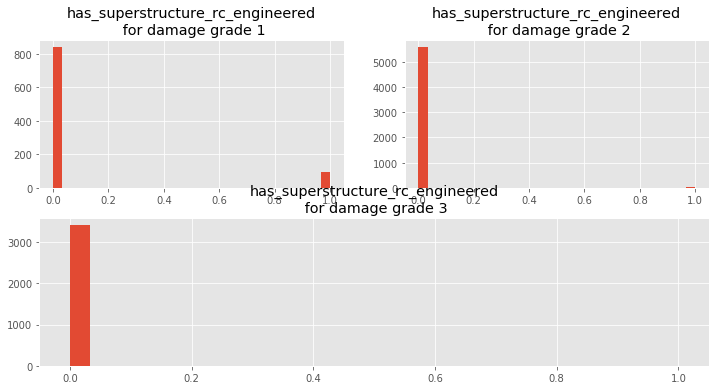

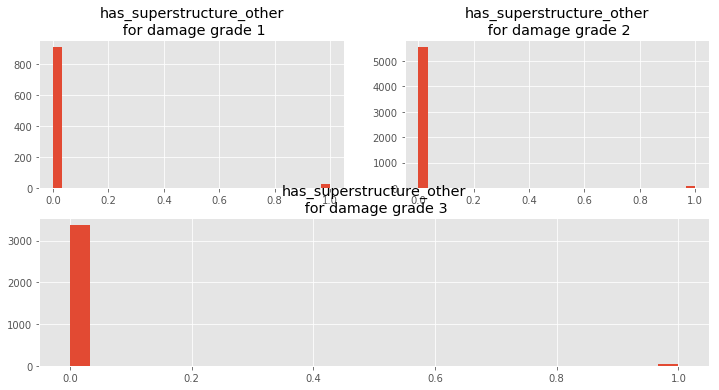

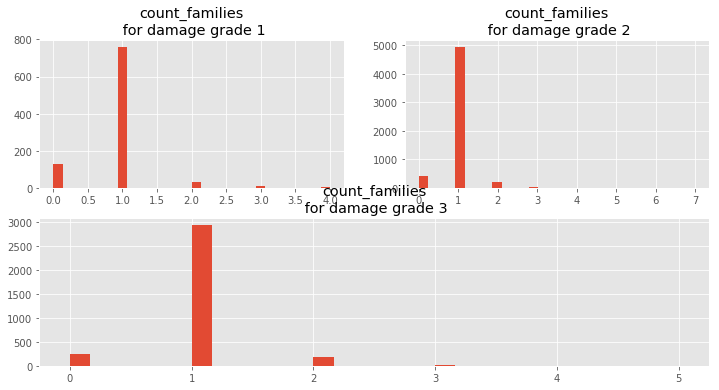

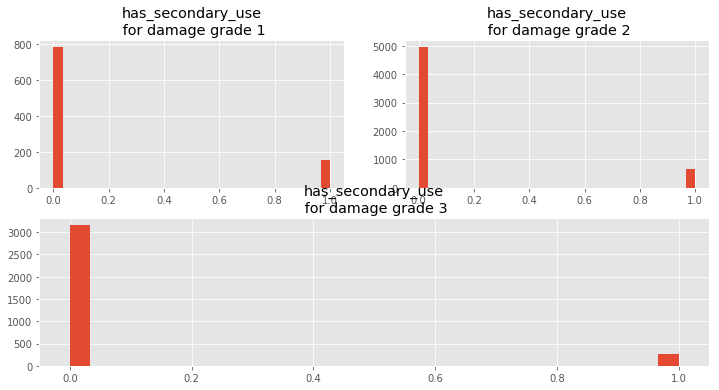

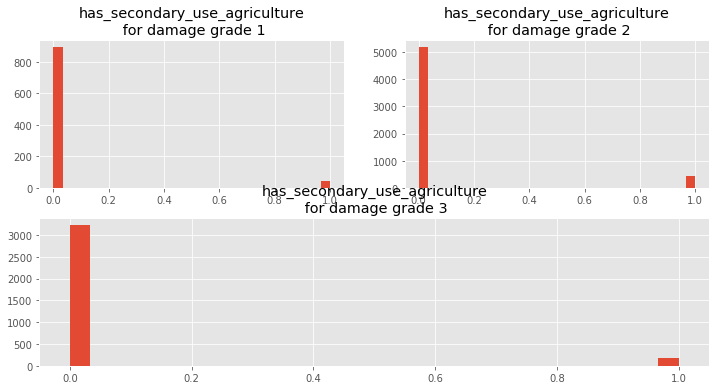

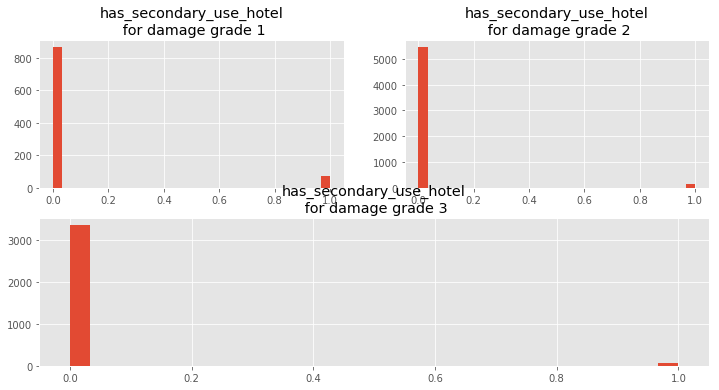

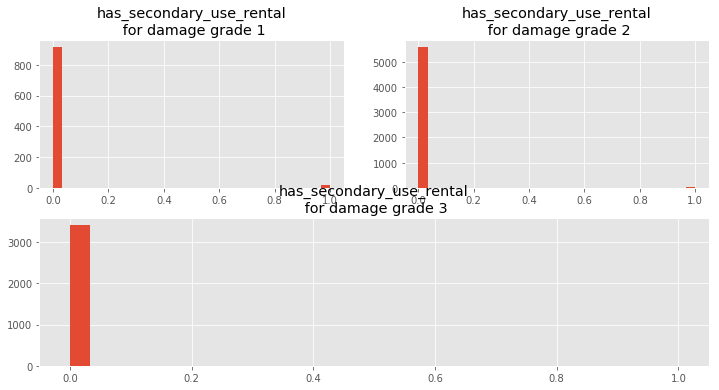

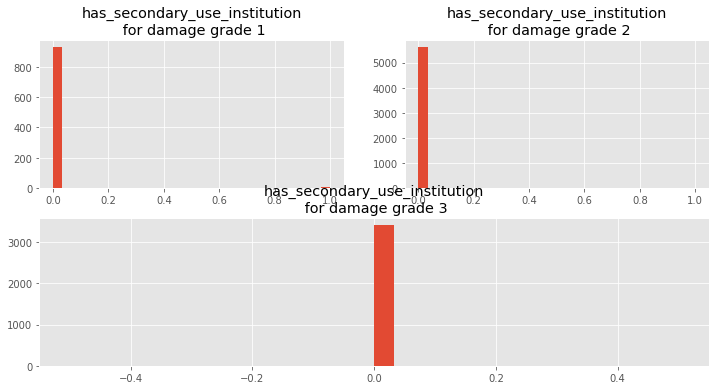

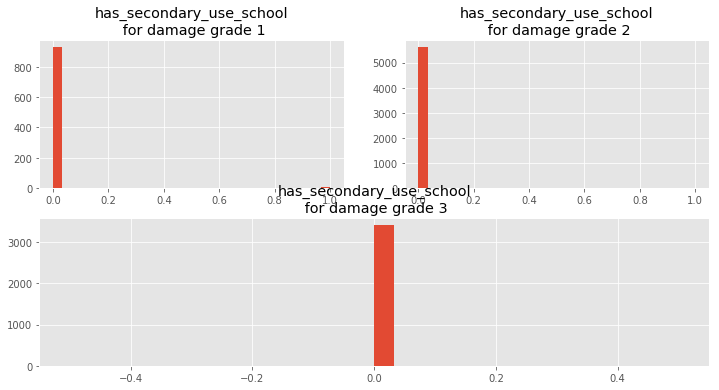

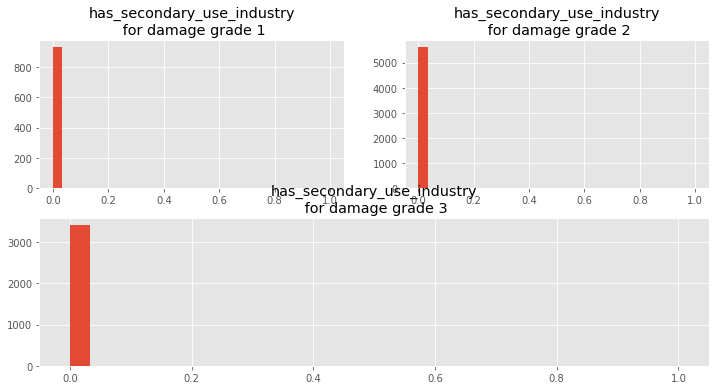

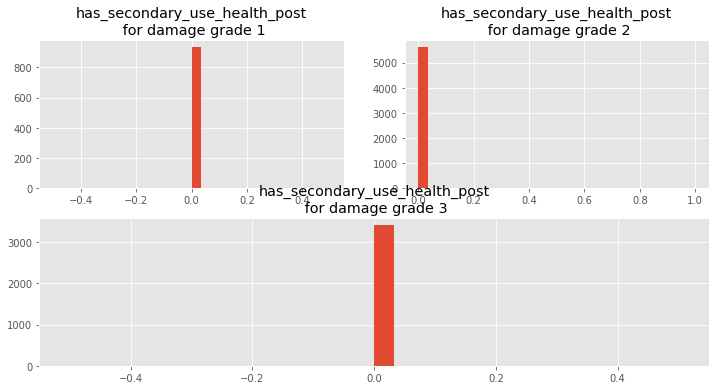

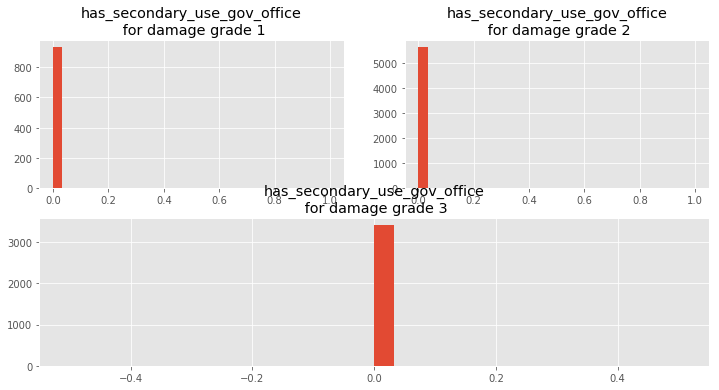

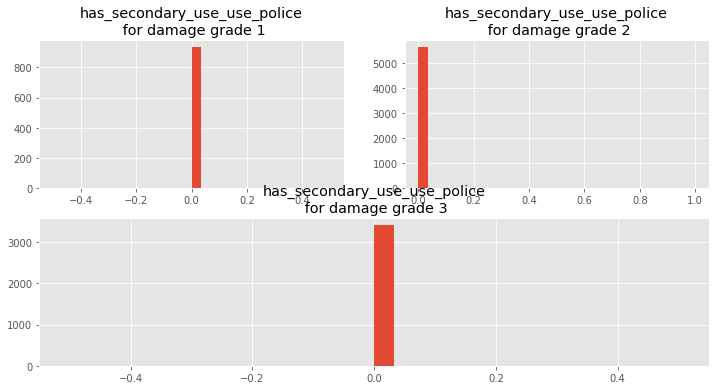

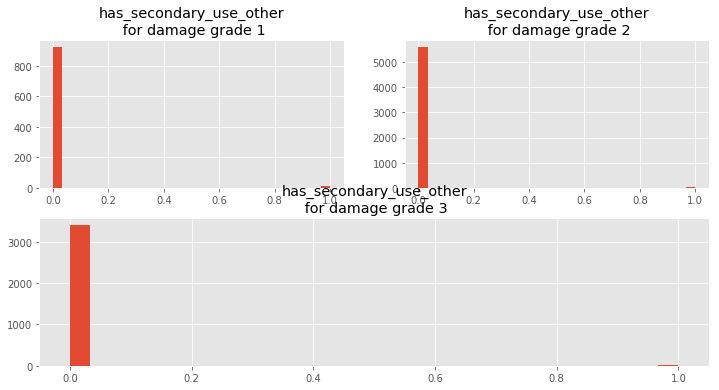

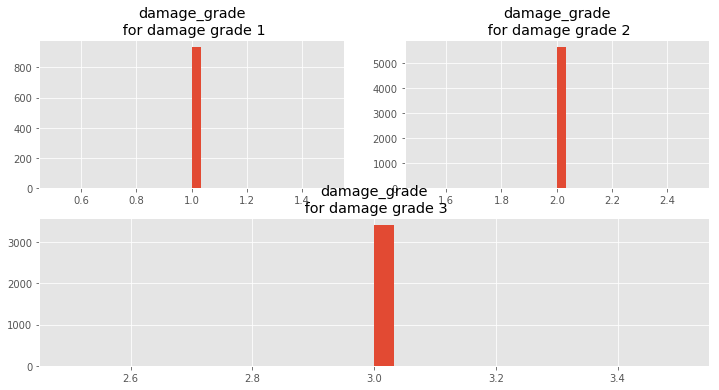

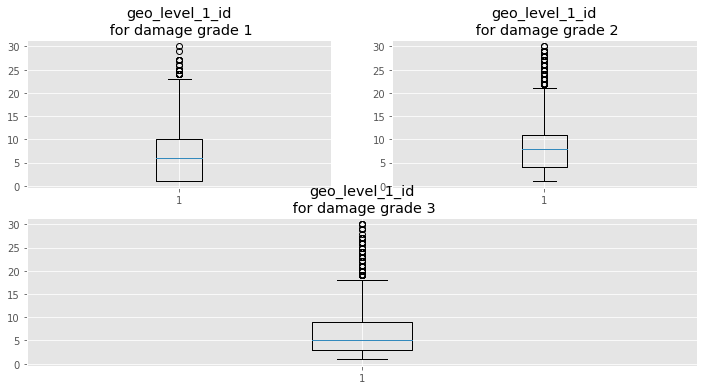

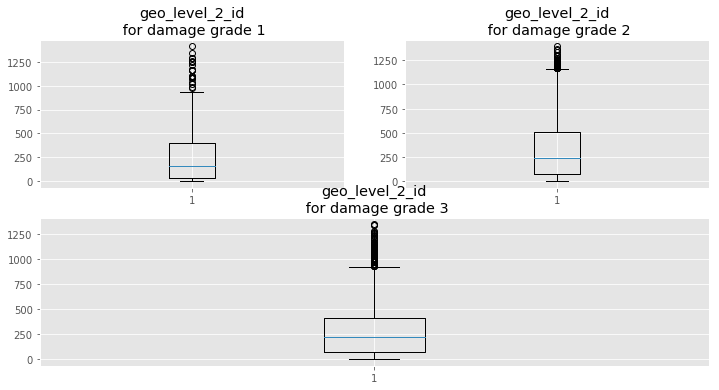

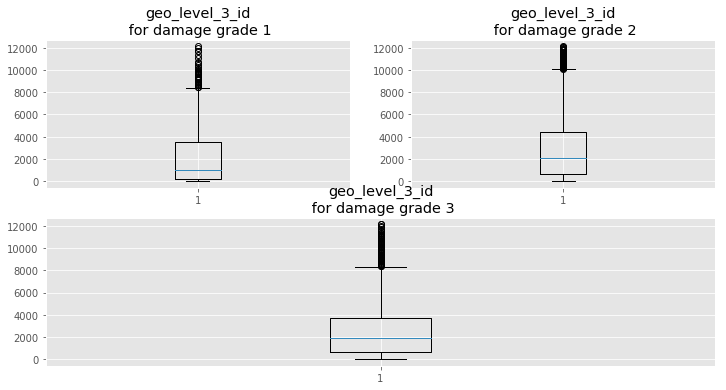

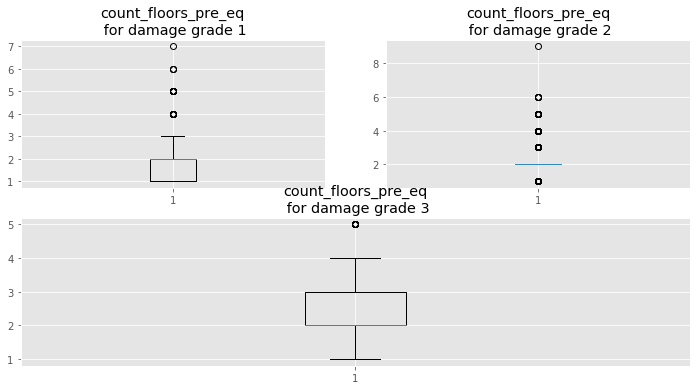

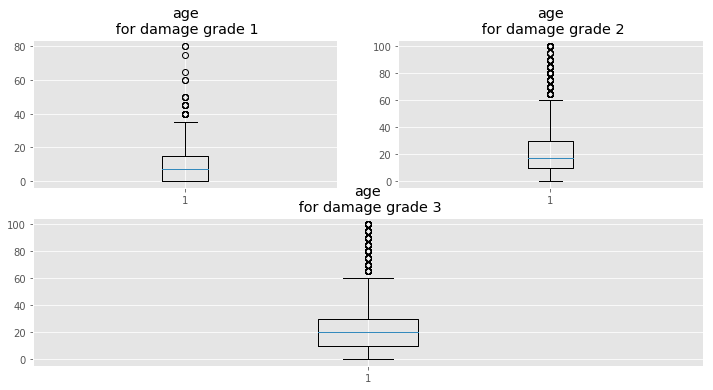

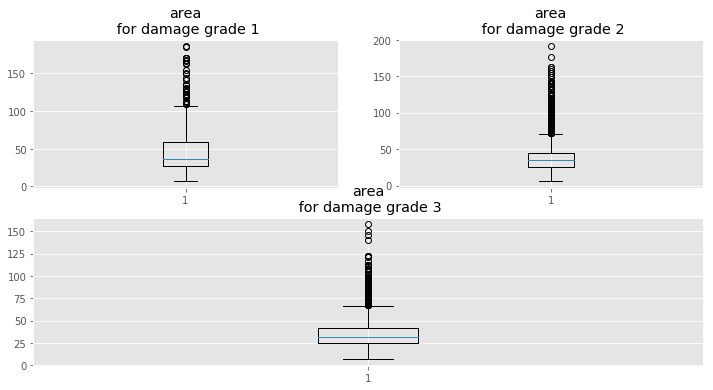

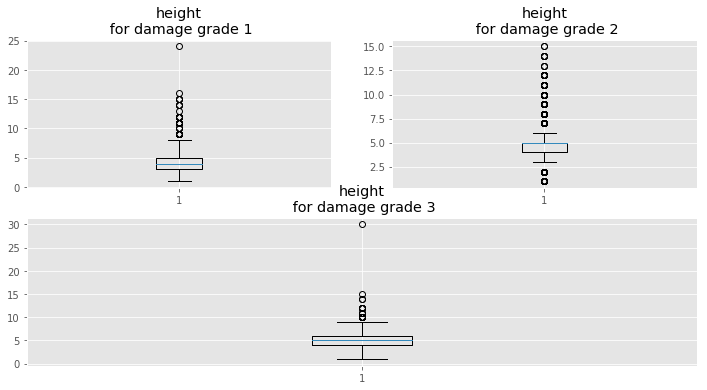

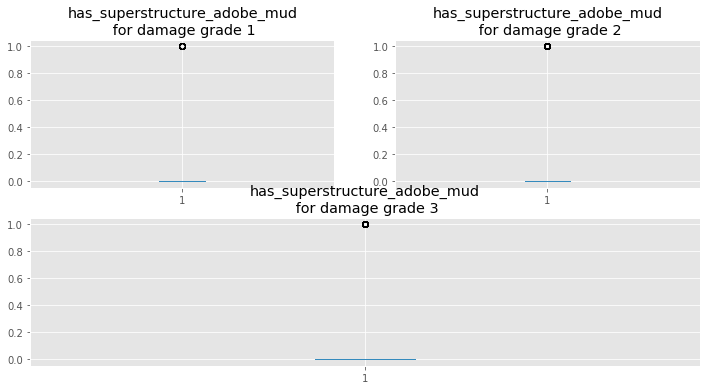

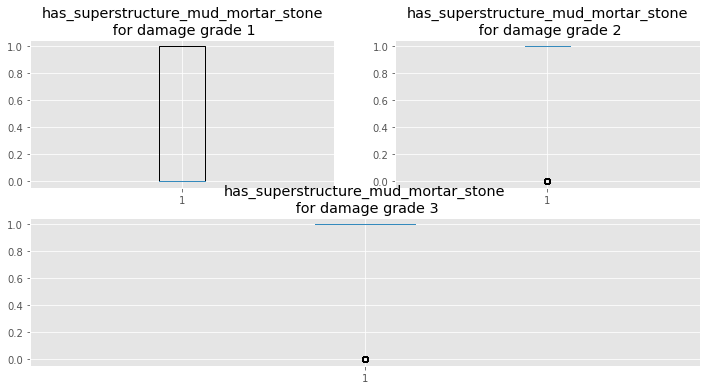

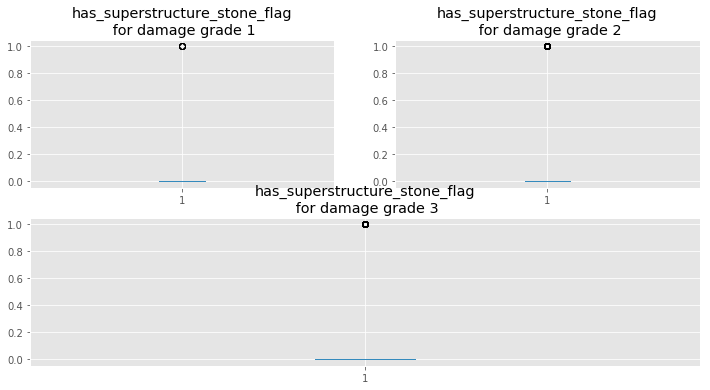

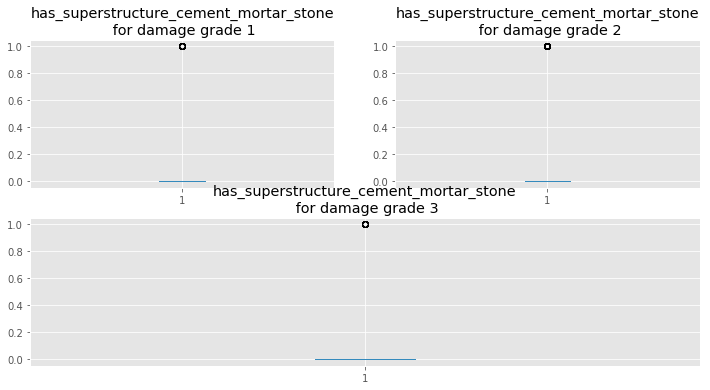

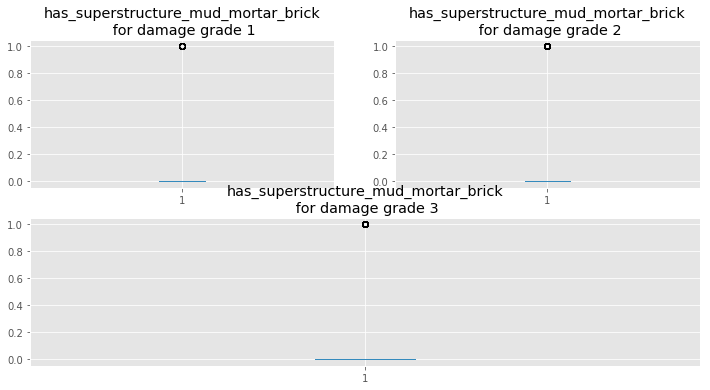

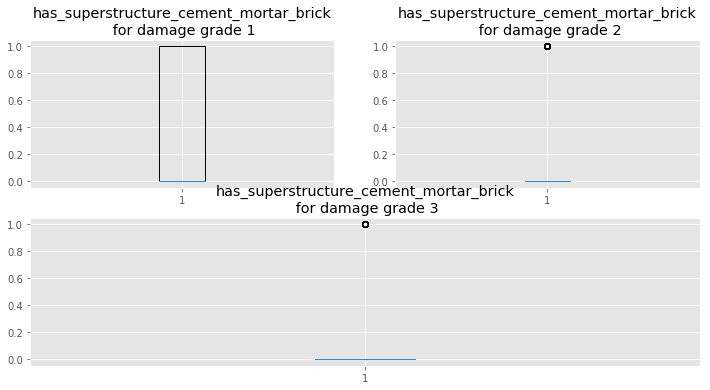

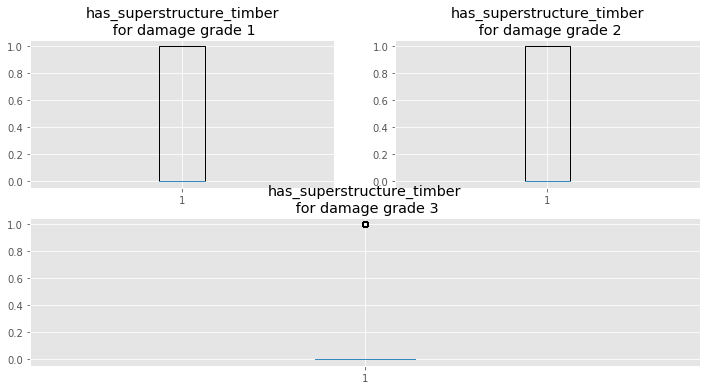

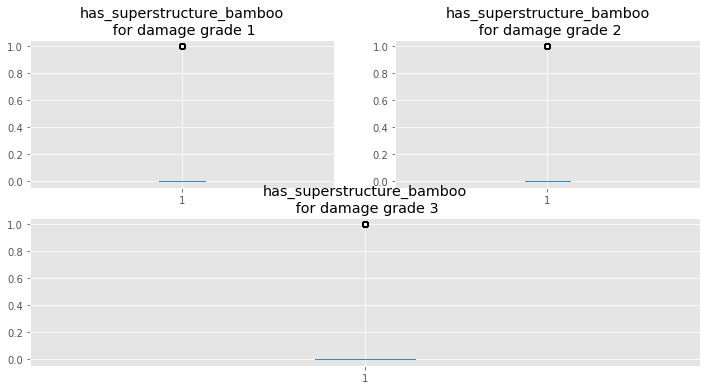

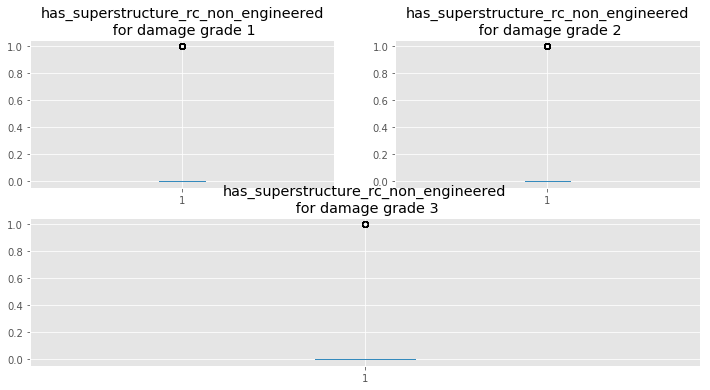

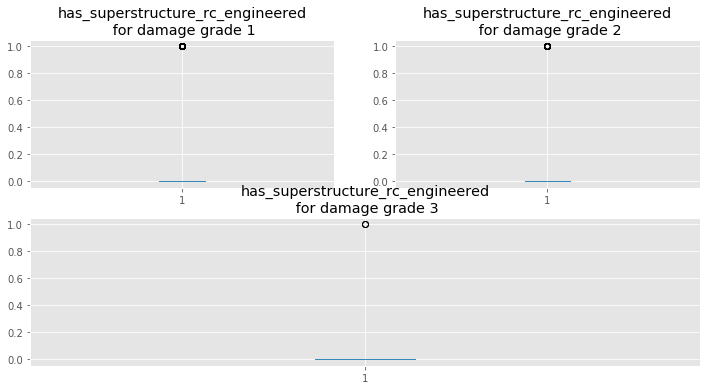

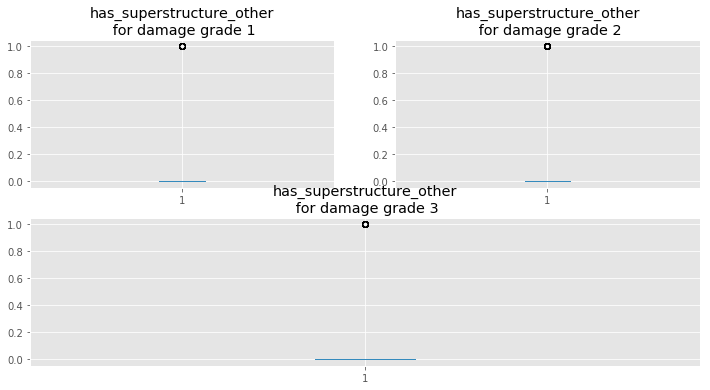

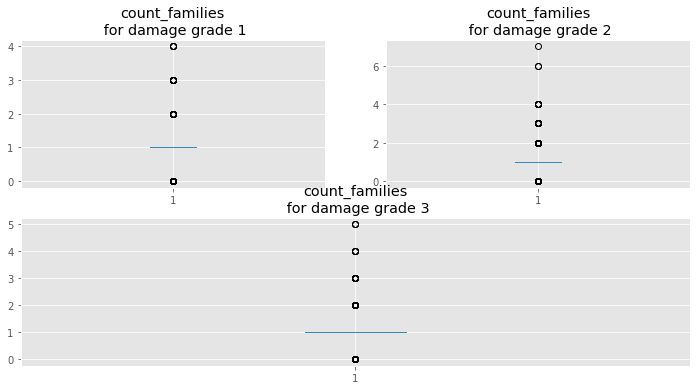

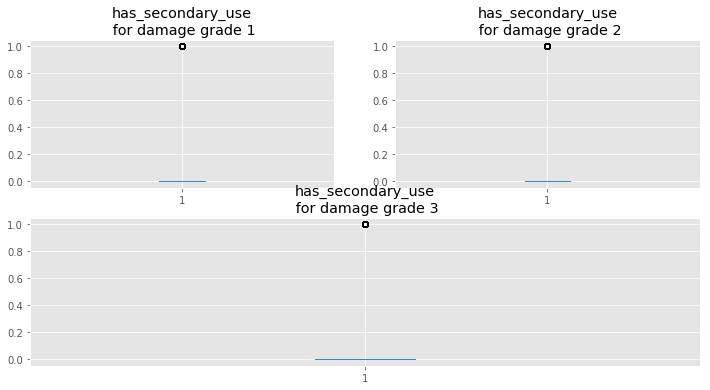

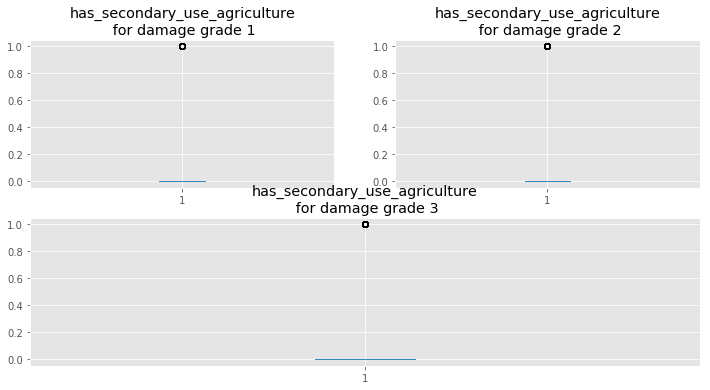

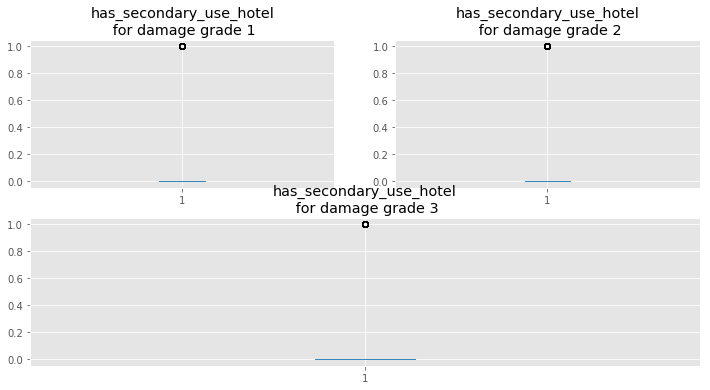

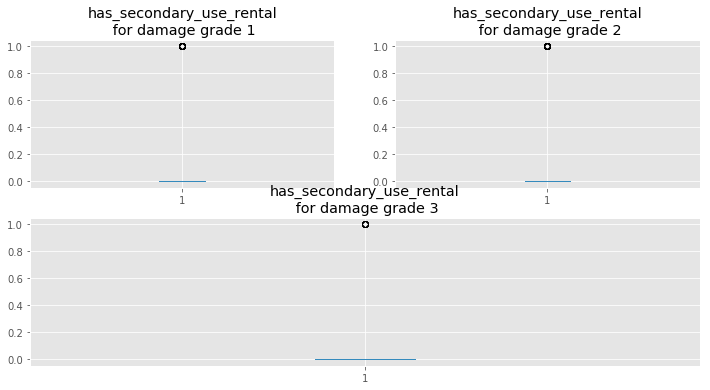

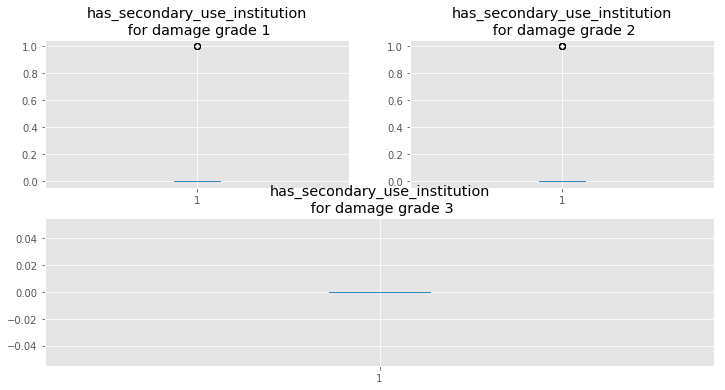

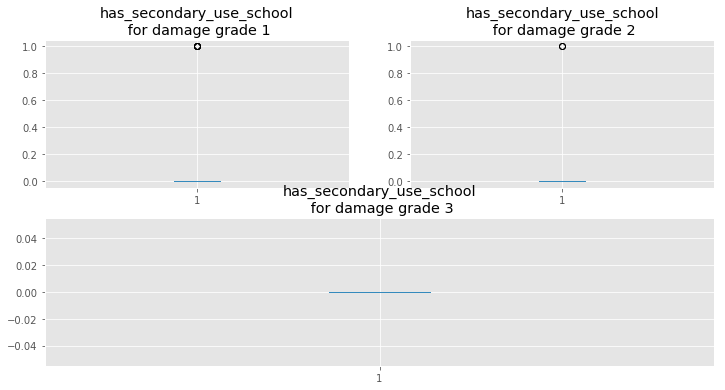

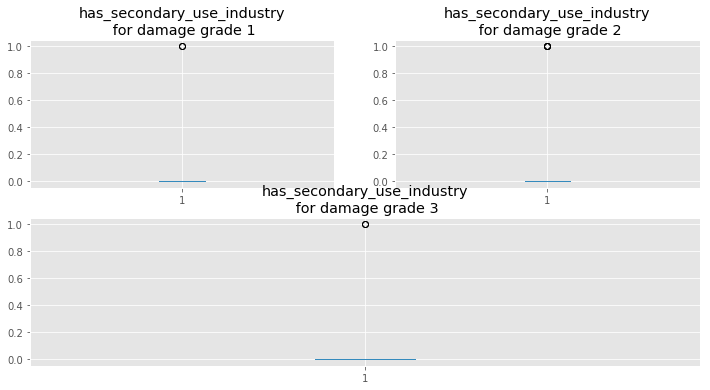

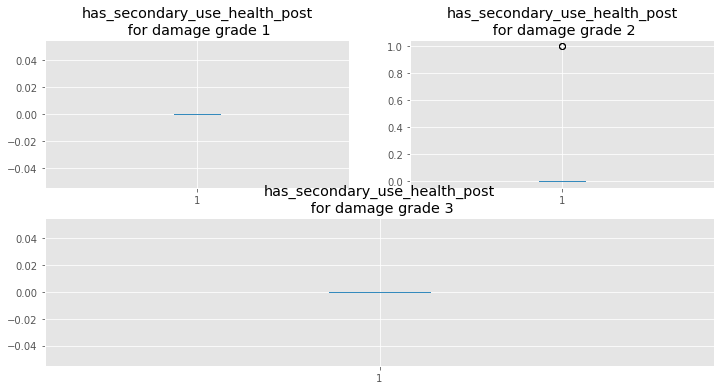

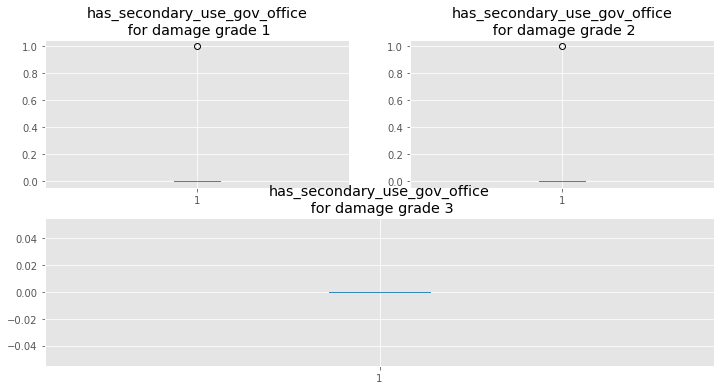

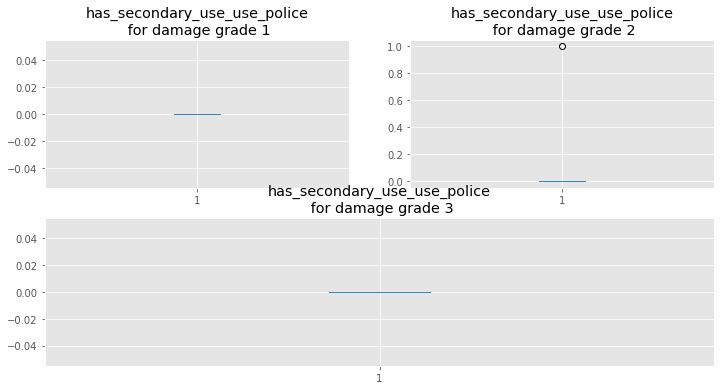

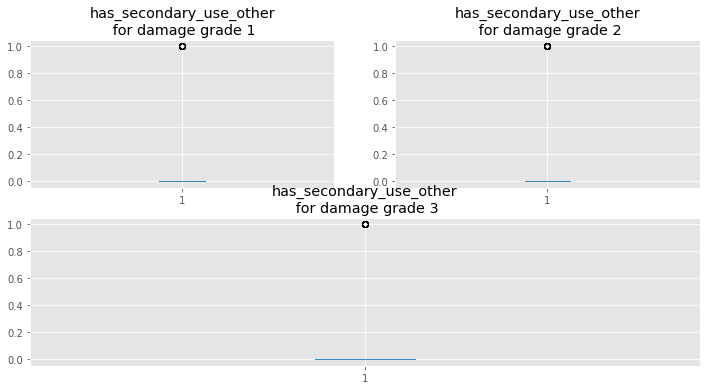

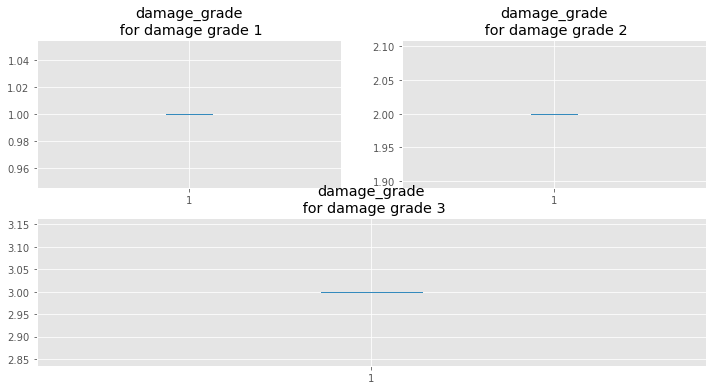

In [83]:
quake_bar(Xy)
quake_hist(Xy)
quake_box(Xy)

<Figure size 432x288 with 0 Axes>

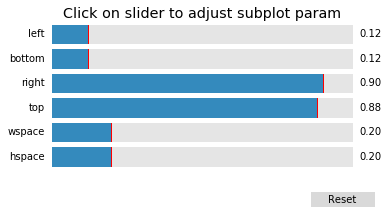

In [84]:
plt.subplot_tool()
plt.show()